<a href="https://colab.research.google.com/github/richasempire/AECTECH/blob/main/RoastMyDesign__NLP_Class_4_570_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4.570 **Natural language processing (NLP)**

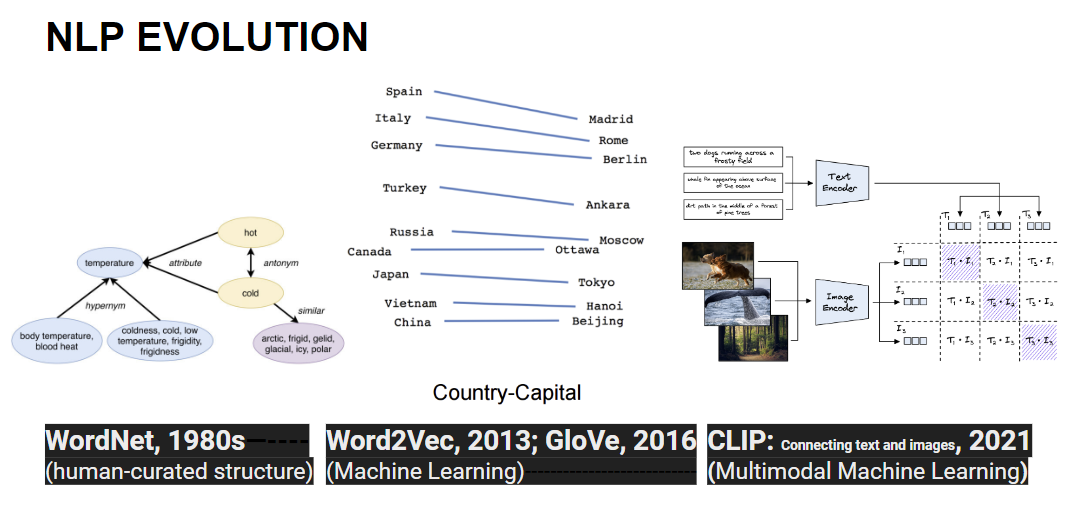

**References and notes:**
1. TOOLKIT https://www.nltk.org/index.html
2. BOOK https://www.nltk.org/book_1ed/
3. TEXT DATA
    1. The nltk package has LOTS of test data to try. Run through the tutorial with the test data first, before trying your own.
    2. look for full text on wikipedia / wikisource. There are formatting and downloading issues. Most old texts (100 years old+) are public domain.
4. some notes for using python 3
    1. some of the tutorial book code is still python2 syntax
        1. function call ( ) needed to call the function : e.g. wn.synset('hero.n.01').definition()
        2. need list( x ) to see it as a list
5. some notes for using colab
    1. source data needs to be local files or url internet accessible
    2. installation/download: download with a specific parameter
        1. nltk.download(“all”)
        2. nltk.download(“corpus”)
        3. nltk.download(“book”)
        4. nltk.download(“popular”)
        5. nltk.download(“gutenberg”)
6. some notes for using local shell
    1. error due to https

In [ ]:
#@title  STEP0: Dependencies

import nltk  # Natural Language Toolkit: provides tools for working with human language data (text)
import re    # Regular expression module: provides operations to create and use regular expressions
import pprint  # Pretty-print module: allows the structured display of data like lists or dictionaries
import requests



In [ ]:
# Install required libraries
!pip install pymupdf
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 13.6 MB/s eta 0:00:00


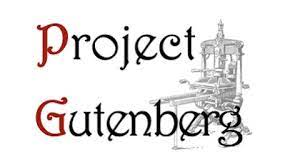

In [ ]:
#@title 0-1_NLTK.DOWNLOAD (50s)
material = 'all' # @param ["all", "corpus", "book","popular","gutenberg"]
print(material)
nltk.download(material)


all


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
#@title STEP1: Download NLTK Gutenberg
import shutil
import os
directory = "/content/nltk_data/corpora/gutenberg/"
# Use exist_ok=True to avoid raising an error if the directory already exists
os.makedirs(directory, exist_ok=True)
# Access the file identifiers for the Gutenberg corpus
target_files=nltk.corpus.gutenberg.fileids()
# Print the file paths for each target file
for file_id in target_files:
    if file_id in target_files:
        # Constructing the path
        file_path = nltk.data.find(f'corpora/gutenberg/{file_id}')
        print(f"{file_path}")
        shutil.copyfile(file_path, file_path.replace("/root","/content"))


/root/nltk_data/corpora/gutenberg/austen-emma.txt
/root/nltk_data/corpora/gutenberg/austen-persuasion.txt
/root/nltk_data/corpora/gutenberg/austen-sense.txt
/root/nltk_data/corpora/gutenberg/bible-kjv.txt
/root/nltk_data/corpora/gutenberg/blake-poems.txt
/root/nltk_data/corpora/gutenberg/bryant-stories.txt
/root/nltk_data/corpora/gutenberg/burgess-busterbrown.txt
/root/nltk_data/corpora/gutenberg/carroll-alice.txt
/root/nltk_data/corpora/gutenberg/chesterton-ball.txt
/root/nltk_data/corpora/gutenberg/chesterton-brown.txt
/root/nltk_data/corpora/gutenberg/chesterton-thursday.txt
/root/nltk_data/corpora/gutenberg/edgeworth-parents.txt
/root/nltk_data/corpora/gutenberg/melville-moby_dick.txt
/root/nltk_data/corpora/gutenberg/milton-paradise.txt
/root/nltk_data/corpora/gutenberg/shakespeare-caesar.txt
/root/nltk_data/corpora/gutenberg/shakespeare-hamlet.txt
/root/nltk_data/corpora/gutenberg/shakespeare-macbeth.txt
/root/nltk_data/corpora/gutenberg/whitman-leaves.txt


In [ ]:
jc_text=nltk.Text(nltk.corpus.gutenberg.words('shakespeare-caesar.txt')) #convert shakespeare-caesar data into Text

In [ ]:
print(len(jc_text))
print(type(jc_text))
print(jc_text[:1000])

25833
<class 'nltk.text.Text'>
['[', 'The', 'Tragedie', 'of', 'Julius', 'Caesar', 'by', 'William', 'Shakespeare', '1599', ']', 'Actus', 'Primus', '.', 'Scoena', 'Prima', '.', 'Enter', 'Flauius', ',', 'Murellus', ',', 'and', 'certaine', 'Commoners', 'ouer', 'the', 'Stage', '.', 'Flauius', '.', 'Hence', ':', 'home', 'you', 'idle', 'Creatures', ',', 'get', 'you', 'home', ':', 'Is', 'this', 'a', 'Holiday', '?', 'What', ',', 'know', 'you', 'not', '(', 'Being', 'Mechanicall', ')', 'you', 'ought', 'not', 'walke', 'Vpon', 'a', 'labouring', 'day', ',', 'without', 'the', 'signe', 'Of', 'your', 'Profession', '?', 'Speake', ',', 'what', 'Trade', 'art', 'thou', '?', 'Car', '.', 'Why', 'Sir', ',', 'a', 'Carpenter', 'Mur', '.', 'Where', 'is', 'thy', 'Leather', 'Apron', ',', 'and', 'thy', 'Rule', '?', 'What', 'dost', 'thou', 'with', 'thy', 'best', 'Apparrell', 'on', '?', 'You', 'sir', ',', 'what', 'Trade', 'are', 'you', '?', 'Cobl', '.', 'Truely', 'Sir', ',', 'in', 'respect', 'of', 'a', 'fine', 'Workm

## STEP2: Tools for NLP
A concordance is a type of index, per each word, with a window of text before and after the word in the text.

Generate a concordance entry for the word "base", with 150 characters on each side of the word.

In [ ]:
#@title 2-1_Count & Concordance
jc_text.count("light")
jc_text.concordance("light") #default window

Displaying 5 of 5 matches:
 intermit the plague That needs must light on this Ingratitude Fla . Go , go , 
 whizzing in the ayre , Giue so much light , that I may reade by them . Opens t
terance of my Tongue ) A Curse shall light vpon the limbes of men ; Domesticke 
ost on him : Now Titinius . Now some light : O he lights too . Hee ' s tane . S
it . Statillius shew ' d the Torch - light , but my Lord He came not backe : he


In [ ]:
jc_text.concordance("light",150)

Displaying 5 of 5 matches:
on your knees , Pray to the Gods to intermit the plague That needs must light on this Ingratitude Fla . Go , go , good Countrymen , and for this faul
 . Enter . Brut . The exhalations , whizzing in the ayre , Giue so much light , that I may reade by them . Opens the Letter , and reades . Brutus tho
by lips , To begge the voyce and vtterance of my Tongue ) A Curse shall light vpon the limbes of men ; Domesticke Fury , and fierce Ciuill strife , S
et he spurres on . Now they are almost on him : Now Titinius . Now some light : O he lights too . Hee ' s tane . Showt . And hearke , they shout for 
 of friends , rest on this Rocke Clit . Statillius shew ' d the Torch - light , but my Lord He came not backe : he is or tane , or slaine Brut . Sit 


In [ ]:
jc_text.count(".")
jc_text.concordance("stand",150)

Displaying 25 of 35 matches:
Peace ho , Caesar speakes Caes . Calphurnia Calp . Heere my Lord Caes . Stand you directly in Antonio ' s way , When he doth run his course . Antonio
and , Most bloodie , fierie , and most terrible . Enter Cinna . Caska . Stand close a while , for heere comes one in haste Cassi . ' Tis Cinna , I do
ooke them vp : Shall Rome , & c . Thus must I piece it out : Shall Rome stand vnder one mans awe ? What Rome ? My Ancestors did from the streetes of 
om him Cas . But what of Cicero ? Shall we sound him ? I thinke he will stand very strong with vs Cask . Let vs not leaue him out Cyn . No , by no me
be of Caesar . Let ' s be Sacrificers , but not Butchers Caius : We all stand vp against the spirit of Caesar , And in the Spirit of men , there is n
ld speak with you Bru . Caius Ligarius , that Metellus spake of . Boy , stand aside . Caius Ligarius , how ? Cai . Vouchsafe good morrow from a feebl
 . The mighty Gods defend thee . Thy Louer , Artemidorus . Heere will I

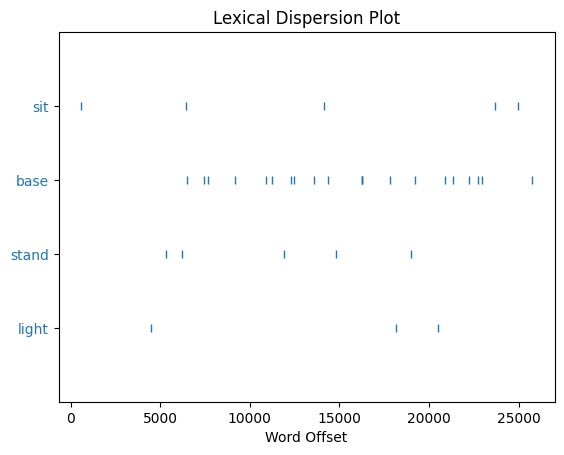

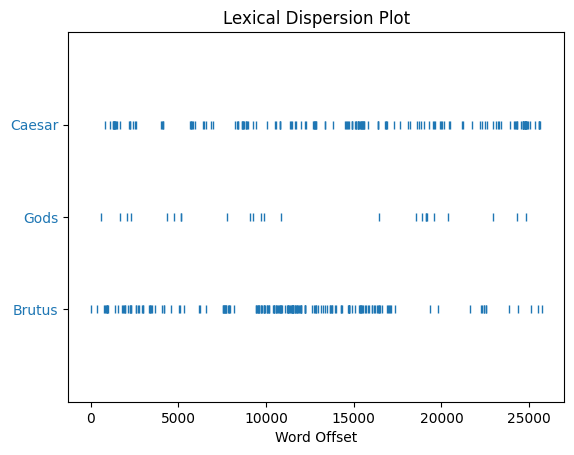

In [ ]:
#@title  2-2_Lexical Dispersion Plot
jc_text.dispersion_plot( ["light","stand","base","sit"] )
jc_text.dispersion_plot(["Brutus","Gods","Caesar"])

Indices of 'base': [799, 1123, 1262, 1279, 1309, 1317, 1349, 1395, 1411, 1449, 1504, 1707, 2204, 2222, 2277, 2416, 2551, 2598, 4042, 4045, 4104, 4109, 5685, 5714, 5735, 5755, 5821, 5937, 6435, 6460, 6566, 6876, 6961, 8254, 8326, 8383, 8430, 8609, 8638, 8673, 8697, 8735, 8856, 8866, 8933, 8992, 9235, 9426, 10033, 10539, 10573, 10778, 10793, 10821, 11386, 11402, 11458, 11670, 11729, 12005, 12221, 12310, 12688, 12728, 12755, 12781, 12808, 12847, 12859, 13367, 13385, 13839, 14483, 14572, 14596, 14689, 14708, 14909, 14912, 14933, 15067, 15109, 15137, 15247, 15261, 15268, 15286, 15387, 15421, 15428, 15464, 15472, 15525, 15533, 15568, 15589, 15841, 16361, 16398, 16409, 16763, 16865, 16868, 16917, 17285, 17658, 18125, 18220, 18594, 18724, 18859, 19009, 19300, 19549, 19606, 19623, 19932, 19981, 20031, 20169, 20463, 20471, 21195, 21228, 21731, 22203, 22310, 22464, 22587, 22956, 23140, 23227, 23304, 23427, 23929, 24156, 24187, 24276, 24290, 24327, 24551, 24637, 24640, 24644, 24652, 24717, 24750, 

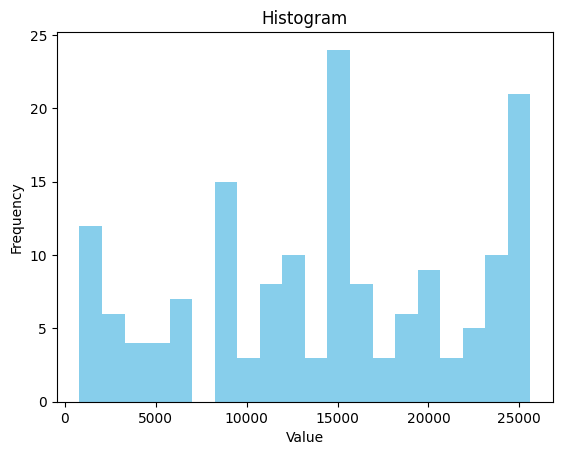

In [ ]:
#@title ___Histogram for LD
base_indices = [i for i, word in enumerate(jc_text) if word == "Brutus"]

# Print the indices
print("Indices of 'base':", base_indices)
import matplotlib.pyplot as plt

# Create histogram
plt.hist(base_indices, bins=20, color='skyblue')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()



Indices of 'base': [579, 1679, 2095, 2294, 4332, 4785, 5143, 5155, 7753, 9087, 9271, 9729, 9866, 10869, 16423, 18574, 18867, 19139, 19142, 19201, 19565, 20400, 22959, 24306, 24809]


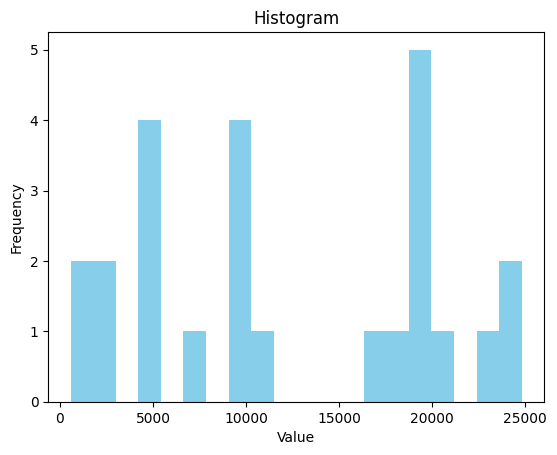

In [ ]:
base_indices = [i for i, word in enumerate(jc_text) if word == "Gods"]

# Print the indices
print("Indices of 'base':", base_indices)
import matplotlib.pyplot as plt

# Create histogram
plt.hist(base_indices, bins=20, color='skyblue')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show plot
plt.show()

In [ ]:
#@title 2-3_Most Common

import nltk
from nltk import FreqDist

# Assuming jc_text is an nltk.Text object or a list of words
# If it's not defined in this snippet, make sure you have it defined in your environment
# For example, if you're working with "Jul

fdist1=FreqDist(jc_text)
l100=fdist1.most_common(100)
print(l100)
for i in l100:
  print(i)

[(',', 2204), ('.', 1296), ('I', 531), ('the', 502), (':', 499), ('and', 409), ("'", 384), ('to', 370), ('you', 342), ('of', 336), ('?', 296), ('not', 249), ('a', 240), ('is', 230), ('And', 218), ('d', 215), ('in', 204), ('that', 200), ('Caesar', 189), ('my', 188), ('me', 187), ('it', 166), ('him', 165), ('Brutus', 161), ('Bru', 153), ('his', 150), ('this', 141), ('your', 137), ('be', 132), ('with', 131), ('he', 129), ('will', 129), ('haue', 128), ('for', 118), ('do', 110), ('so', 109), ('shall', 107), ('Cassi', 107), (';', 106), ('thou', 100), ('as', 100), ('are', 96), ('all', 90), ('That', 89), ('Cassius', 85), ('by', 82), ('we', 82), ('then', 79), ('our', 79), ('on', 78), ('The', 76), ('-', 76), ('To', 76), ('Antony', 75), ('But', 73), ('What', 70), ('O', 69), ('but', 68), ('no', 68), ('know', 66), ('did', 66), ('was', 64), ('Enter', 63), ('men', 62), ('vs', 62), ('them', 60), ('what', 59), ('man', 58), ('For', 58), ('their', 57), ('at', 57), ('If', 55), ('thee', 55), ('am', 52), ('

In [ ]:
#@title ___Filtering
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
import string

# Download the stopwords dataset, if not already downloaded
nltk.download('stopwords')

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Define a list of punctuation characters to exclude
punctuation = set(string.punctuation)

# Filter out stop words and punctuation from jc_text
filtered_jc_text = [word for word in jc_text if word.lower() not in stop_words and word not in punctuation]

# Create a frequency distribution of the filtered text
fdist1 = FreqDist(filtered_jc_text)

# Get the 100 most common words
l100 = fdist1.most_common(1000)
print(l100)

# Print each of the 100 most common words
for i in l100:
    print(i)


[('Caesar', 189), ('Brutus', 161), ('Bru', 153), ('haue', 128), ('shall', 107), ('Cassi', 107), ('thou', 100), ('Cassius', 85), ('Antony', 75), ('know', 66), ('Enter', 63), ('men', 62), ('vs', 62), ('man', 58), ('thee', 55), ('come', 50), ('good', 49), ('Ant', 48), ('thy', 46), ('day', 44), ('Lord', 44), ('well', 43), ('let', 42), ('heere', 41), ('would', 40), ('st', 39), ('selfe', 39), ('Caes', 39), ('Noble', 39), ('Rome', 38), ('Caesars', 38), ('Cask', 38), ('Brut', 37), ('vpon', 36), ('may', 35), ('heare', 34), ('say', 33), ('see', 33), ('Caska', 33), ('tell', 33), ('like', 33), ('one', 32), ('vp', 31), ('must', 30), ('go', 30), ('doth', 29), ('Let', 29), ('hath', 29), ('much', 28), ('feare', 28), ('Luc', 28), ('yet', 27), ('euery', 27), ('speake', 27), ('hand', 26), ('loue', 26), ('death', 26), ('Cinna', 26), ('Lucius', 26), ('great', 25), ('Gods', 25), ('Messala', 25), ('time', 24), ('Come', 24), ('make', 23), ('downe', 23), ('Friends', 23), ('Titinius', 23), ('done', 23), ('night

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NLTK sentiment
1. https://www.nltk.org/howto/sentiment.html
2. https://realpython.com/python-nltk-sentiment-analysis/

built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).

In [ ]:
#@title 2-4_NLTK sentiment
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the necessary NLTK data and the VADER lexicon
nltk.download('punkt')  # Ensure that the punkt tokenizer is downloaded
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Assuming jc_text is an nltk.Text object
# Convert nltk.Text object to a single string
text_str = " ".join(jc_text)

# Tokenize the text into sentences
sentences = nltk.sent_tokenize(text_str)

# Analyze the sentiment of the first 100 sentences
first_100_sentiments = [sia.polarity_scores(sentence) for sentence in sentences[:100]]


print("architecture" in "architecture is amazing ")


# Print the sentiment scores for the first 100 sentences
for i, score in enumerate(first_100_sentiments):
    print(sentences[i])
    print(f"Sentence {i+1}: {score}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True
[ The Tragedie of Julius Caesar by William Shakespeare 1599 ] Actus Primus .
Sentence 1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Scoena Prima .
Sentence 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Enter Flauius , Murellus , and certaine Commoners ouer the Stage .
Sentence 3: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Flauius .
Sentence 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Hence : home you idle Creatures , get you home : Is this a Holiday ?
Sentence 5: {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.481}
What , know you not ( Being Mechanicall ) you ought not walke Vpon a labouring day , without the signe Of your Profession ?
Sentence 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Speake , what Trade art thou ?
Sentence 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Car .
Sentence 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Why Sir , a Carpenter Mur .
Sentence 9: {'neg': 0.0, 'neu': 1.

In [ ]:
print(type(sentence))

NameError: name 'sentence' is not defined

In [ ]:
print("architecture" in "architecture is amazing ")

content=["architecture is amazing ","architecture is art", "hello world"]
list_=[]
for i in content:
  if "architecture" in i:
    list_.append(i)
print(list_)




True
['architecture is amazing ', 'architecture is art']


In [ ]:
#@title ___Sorting by neg value
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the necessary NLTK data and the VADER lexicon
nltk.download('punkt')  # Ensure that the punkt tokenizer is downloaded
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Assuming jc_text is an nltk.Text object
# Convert nltk.Text object to a single string
text_str = " ".join(jc_text)

# Tokenize the text into sentences
sentences = nltk.sent_tokenize(text_str)

# Analyze the sentiment of the first 100 sentences
first_100_sentiments = [(sentence, sia.polarity_scores(sentence)) for sentence in sentences[:100]]

# Sort the sentences by their negative sentiment score
sorted_by_negative = sorted(first_100_sentiments, key=lambda x: x[1]['neg'], reverse=True)

# Print the sorted sentences and their negative scores
for sentence, scores in sorted_by_negative:
    print(f"Sentence: {sentence}\nNegative Score: {scores['neg']}\n")


Sentence: Into what dangers , would you Leade me Cassius ?
Negative Score: 0.314

Sentence: Set on , and leaue no Ceremony out Sooth .
Negative Score: 0.239

Sentence: Forget not in your speed Antonio , To touch Calphurnia : for our Elders say , The Barren touched in this holy chace , Shake off their sterrile curse Ant .
Negative Score: 0.236

Sentence: I heare a Tongue shriller then all the Musicke Cry , Caesar : Speake , Caesar is turn ' d to heare Sooth .
Negative Score: 0.171

Sentence: You Blockes , you stones , you worse then senslesse things : O you hard hearts , you cruell men of Rome , Knew you not Pompey many a time and oft ?
Negative Score: 0.164

Sentence: A Trade Sir , that I hope I may vse , with a safe Conscience , which is indeed Sir , a Mender of bad soules Fla .
Negative Score: 0.144

Sentence: Truly sir , all that I liue by , is with the Aule : I meddle with no Tradesmans matters , nor womens matters ; but withal I am indeed Sir , a Surgeon to old shooes : when they 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


WordNet
Which is a NLTK module, but it is also its own separated project/database/tool. WordNet is a lexical database. The central unit is the “synset”, which are semantic equivalents, or synonyms. The large collection of SYNSETS are structured into a lexical ontology (as a hierarchy of trees).

References and notes:
1. WordNet NLTK: https://www.nltk.org/howto/wordnet.html
2. website: https://wordnet.princeton.edu
3. wiki: https://en.wikipedia.org/wiki/WordNet
4. book:   Fellbaum, Christiane. WordNet : an Electronic Lexical Database. Cambridge, Mass: MIT Press, 1998. Print.

In [ ]:
#@title 2-5_WordNet: synsets
from nltk.corpus import wordnet as wn

# Function to analyze word senses using WordNet
def analyze_word_senses(word):
    senses = wn.synsets(word)
    for sense in senses:
        print(f"Word: {word}")
        print(f"Definition: {sense.definition()}")
        print(f"Examples: {sense.examples()}")
        print("\n")

# Analyze the first 10 unique words in jc_text
unique_words = set(jc_text)
print("Unique words:", unique_words)
for word in list(unique_words)[:2]:
    analyze_word_senses(word)


Unique words: {'Quintus', 'Var', 'guilty', 'Hye', 'done', 'Traitor', 'confounded', 'Eare', 'wayes', 'if', 'abide', 'discard', 'Showts', 'feede', 'rise', 'Orator', 'Wound', 'partake', 'Plucking', '.', 'strong', 'There', 'Be', 'Tyrant', 'manner', 'great', 'giues', 'ended', 'Things', 'auoyded', 'sweare', 'qualitie', 'Marriage', 'Weeping', 'enuy', 'mouths', 'affraid', 'An', 'flame', 'gone', 'chide', 'Greeke', 'shalt', 'Mart', 'Robe', 'enterprize', 'vndone', 'pitch', 'Spaine', 'your', 'two', 'Stoope', 'Farwell', 'Concaue', 'Ant', 'waste', 'appeas', '1', 'Carpenter', 'dye', 'wearie', 'read', 'credit', 'rather', 'bad', 'teach', 'bowl', 'courtesie', 'How', 'fatter', 'not', 'Directly', 'naked', 'bound', 'added', 'Slaues', 'marrie', 'corruption', 'Drachmaes', 'beyond', 'Fountaine', 'ye', 'Away', 'prythee', 'beside', 'Valiant', 'belou', 'teares', 'strife', 'such', 'think', 'falser', 'Graues', 'pause', 'banished', 'Vp', 'sits', 'along', 'Th', 'fooles', 'Shallowes', 'Cinna', 'mad', 'stood', 'selues

In [ ]:
analyze_word_senses("Accents")

Word: Accents
Definition: distinctive manner of oral expression
Examples: ["he couldn't suppress his contemptuous accent", 'she had a very clear speech pattern']


Word: Accents
Definition: special importance or significance
Examples: ['the red light gave the central figure increased emphasis', 'the room was decorated in shades of grey with distinctive red accents']


Word: Accents
Definition: the usage or vocabulary that is characteristic of a specific group of people
Examples: ['the immigrants spoke an odd dialect of English', 'he has a strong German accent', 'it has been said that a language is a dialect with an army and navy']


Word: Accents
Definition: the relative prominence of a syllable or musical note (especially with regard to stress or pitch)
Examples: ['he put the stress on the wrong syllable']


Word: Accents
Definition: a diacritical mark used to indicate stress or placed above a vowel to indicate a special pronunciation
Examples: []


Word: Accents
Definition: to stress

In [ ]:
word_string="Accents"
s=wn.synsets(word_string)
list_=[[i.lexname(),i.definition(),i.examples()] for i in s ]
for i in list_:
  print(i)

['noun.communication', 'distinctive manner of oral expression', ["he couldn't suppress his contemptuous accent", 'she had a very clear speech pattern']]
['noun.state', 'special importance or significance', ['the red light gave the central figure increased emphasis', 'the room was decorated in shades of grey with distinctive red accents']]
['noun.communication', 'the usage or vocabulary that is characteristic of a specific group of people', ['the immigrants spoke an odd dialect of English', 'he has a strong German accent', 'it has been said that a language is a dialect with an army and navy']]
['noun.communication', 'the relative prominence of a syllable or musical note (especially with regard to stress or pitch)', ['he put the stress on the wrong syllable']]
['noun.communication', 'a diacritical mark used to indicate stress or placed above a vowel to indicate a special pronunciation', []]
['verb.communication', 'to stress, single out as important', ['Dr. Jones emphasizes exercise in ad

dog


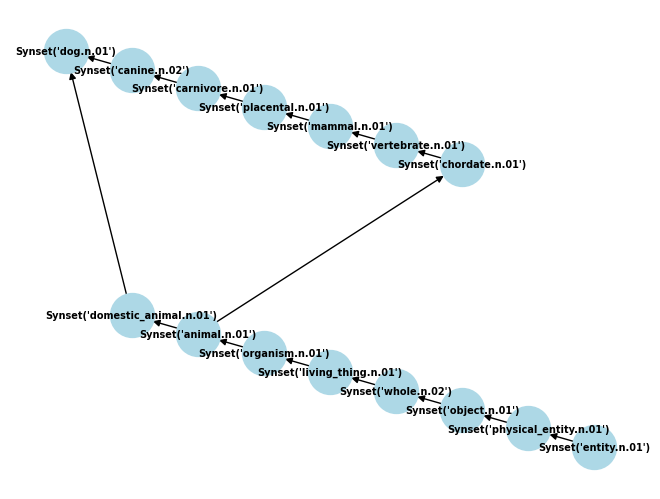

talk


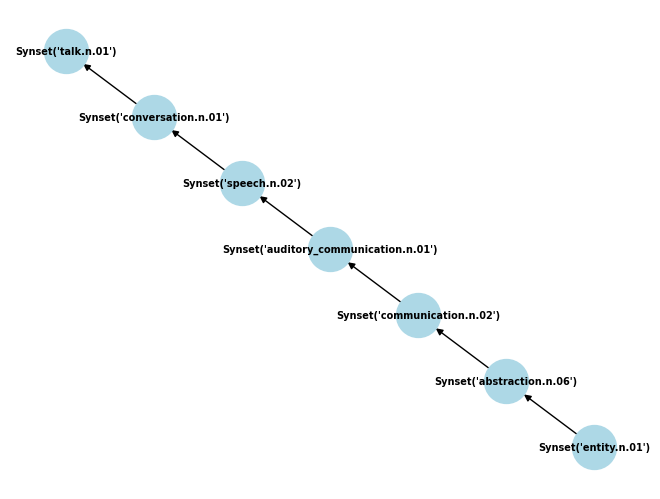

talk


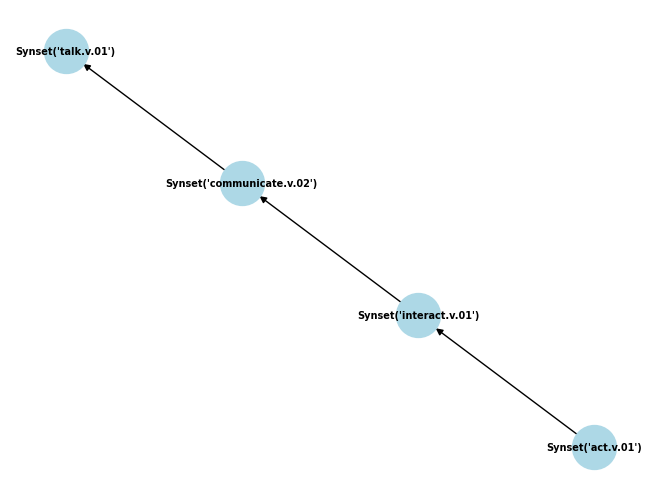

In [ ]:
#@title ___Hypernym Tree
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

def hypernym_tree(synset, graph, pos=None, depth=0, width=1):
    if pos is None:
        pos = {}
    pos[synset] = (depth, -width)
    width += 1
    hypernyms = synset.hypernyms()
    for hypernym in hypernyms:
        graph.add_edge(hypernym, synset)
        pos, width = hypernym_tree(hypernym, graph, pos, depth + 1, width)
    return pos, width

def draw_hypernym_tree(word, pos=wn.NOUN):
    print(word)
    synsets = wn.synsets(word, pos=pos)
    if not synsets:
        print(f"No synsets found for '{word}' with part of speech {pos}.")
        return
    synset = synsets[0]
    G = nx.DiGraph()
    pos, _ = hypernym_tree(synset, G)
    nx.draw(G, pos=pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=7, font_weight='bold')
    plt.show()

# Example usage:

pos_choice = wn.NOUN  # or wn.VERB, wn.ADJ, wn.ADV based on user choice
draw_hypernym_tree('dog', pos=pos_choice)

pos_choice = wn.NOUN  # or wn.VERB, wn.ADJ, wn.ADV based on user choice
draw_hypernym_tree('talk', pos=pos_choice)

pos_choice = wn.VERB  # or wn.VERB, wn.ADJ, wn.ADV based on user choice
draw_hypernym_tree('talk', pos=pos_choice)


In [ ]:
from nltk.corpus import wordnet as wn

def hypernym_paths_to_string(synset, path=[]):
    # Append the current synset to the path
    path.append(synset.name().split('.')[0])

    # Base case: if there are no hypernyms, return the path as a string
    if not synset.hypernyms():
        return [' <- '.join(reversed(path))]

    # Recursive case: extend the current path with paths from hypernyms
    paths = []
    for hypernym in synset.hypernyms():
        paths.extend(hypernym_paths_to_string(hypernym, path.copy()))

    return paths

def get_hypernym_tree_list(word, pos=wn.NOUN):
    print(word)
    synsets = wn.synsets(word, pos=pos)
    if not synsets:
        return [f"No {pos} synsets found for '{word}'."]

    # Using the first synset for the demonstration
    synset = synsets[0]
    return hypernym_paths_to_string(synset)

# Example usage:
pos_choice = wn.NOUN  # or wn.VERB, wn.ADJ, wn.ADV based on user choice
hypernym_list = get_hypernym_tree_list('dog', pos=pos_choice)

for i in hypernym_list:
    print(i)

pos_choice = wn.NOUN  # or wn.VERB, wn.ADJ, wn.ADV based on user choice
hypernym_list = get_hypernym_tree_list('talk', pos=pos_choice)

for i in hypernym_list:
    print(i)

pos_choice = wn.VERB  # or wn.VERB, wn.ADJ, wn.ADV based on user choice
hypernym_list = get_hypernym_tree_list('talk', pos=pos_choice)

for i in hypernym_list:
    print(i)


dog
entity <- physical_entity <- object <- whole <- living_thing <- organism <- animal <- chordate <- vertebrate <- mammal <- placental <- carnivore <- canine <- dog
entity <- physical_entity <- object <- whole <- living_thing <- organism <- animal <- domestic_animal <- dog
talk
entity <- abstraction <- communication <- auditory_communication <- speech <- conversation <- talk <- dog
talk
act <- interact <- communicate <- talk <- talk <- dog


In [ ]:
#@title 2-6_PDF to TXT

import fitz  # PyMuPDF

def pdf_to_text(pdf_path, txt_path):
    # Open the provided PDF file
    document = fitz.open(pdf_path)

    # Iterate over each page and extract text
    with open(txt_path, 'w') as txt_file:
        for page_num in range(len(document)):
            page = document.load_page(page_num)  # Load the current page
            text = page.get_text("text")  # Extract its text
            txt_file.write(text)  # Write the text to the output text file


# Download inception-screenplay.pdf
url = 'https://www.nolanfans.com/library/pdf/inception-screenplay.pdf'
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    with open('inception_screenplay.pdf', 'wb') as f:
        f.write(response.content)
    print("The pdf file was downloaded successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")


# Example usage
pdf_path = '/content/inception_screenplay.pdf'  # Path to your PDF file
txt_path = '/content/inception_screenplay.txt'  # Path for the resulting text file
pdf_to_text(pdf_path, txt_path)

The pdf file was downloaded successfully.


In [ ]:
#@title 2-7_Using NLTK to read txt file

import nltk
from nltk.tokenize import word_tokenize
from nltk.text import Text

file_path = txt_path

# Try different encodings if you know the file's encoding, e.g., 'latin-1', 'cp1252'
encoding = 'utf-8'

# Open the file with error handling
with open(file_path, 'r', encoding=encoding, errors='replace') as file:
    text = file.read()
print("text length:",len(text))
tokens = word_tokenize(text)
my_text = Text(tokens)
my_text.concordance("inception")

text length: 173026
Displaying 7 of 7 matches:
B What do you want from us ? SAITO Inception . Arthur raises his eyebrows . Cob
a busy street . Eames pours . COBB Inception . Eames 's glass stops halfway to 
T 'D ) If you 're going to perform inception , you need imagination . COBB You 
ate espionage , Mr.Saito . This is inception . The seed of the idea we plant wi
 little specificity , Eames . COBB Inception 's not about specificity . When we
ave to understand about me . About inception . You see , an idea is like a viru
my mind . COBB Because I performed inception on my own wife then reaped the bit


In [ ]:
my_text.count("space")
my_text.concordance("space",100)

Displaying 6 of 6 matches:
ks up , squinting . Recognizes Cobb . MILES No space to think in that broom cupboard . Cobb steps d
t ) Real weight , you know ? I thought a dream space would be all about the visual , but it 's the 
SHOP -- CONTINUOUS Ariadne comes into the main space . Someone is there , unpacking one of the MECH
 -- NIGHT Ariadne comes into the darkened main space . Cobb is lying on one of the chairs , asleep 
o . ARIADNE Limbo ? ARTHUR Unconstructed dream space . Raw , infinite subconscious . Nothing there 
2 CONTINUED : ( 3 ) 142 Mal SLIPS FORWARD INTO SPACE . Cobb SCREAMS after her . Then tries to bury 


## STEP3: MEW NLP METHOD

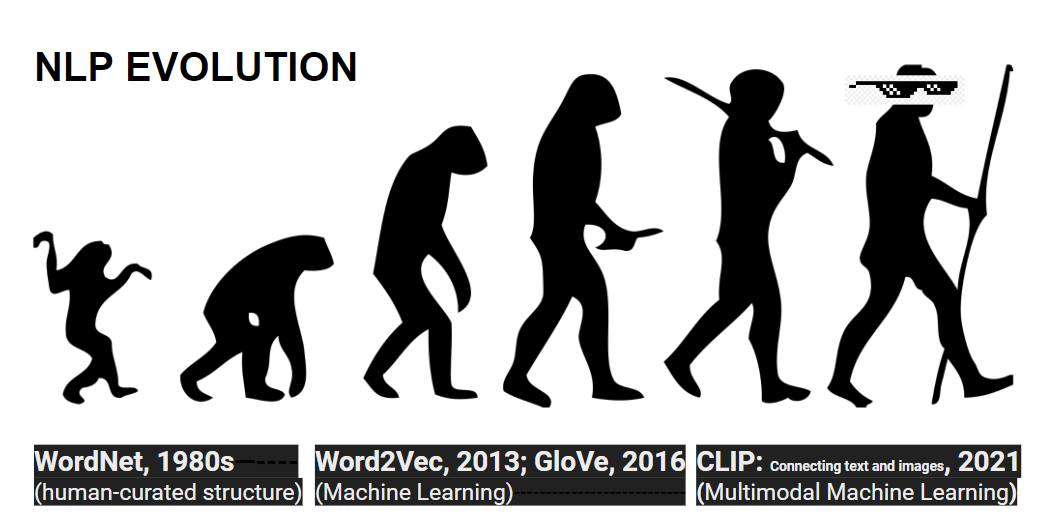

**Use Word2Vec if**:

You have a domain-specific dataset and want your embeddings to reflect the specific semantics of your domain.
You prefer a model that is relatively simple and quick to train on smaller datasets.

**Use GloVe if**:

You need embeddings that capture global co-occurrence statistics and provide a more comprehensive semantic representation.
You prefer to use pre-trained word embeddings to leverage knowledge from larger corpora.

In [ ]:
#@title 3-0_ Downloading GloVe (3 mins)
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-03-18 04:12:03--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-03-18 04:12:03--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 39s  

2024-03-18 04:14:43 (5.16 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


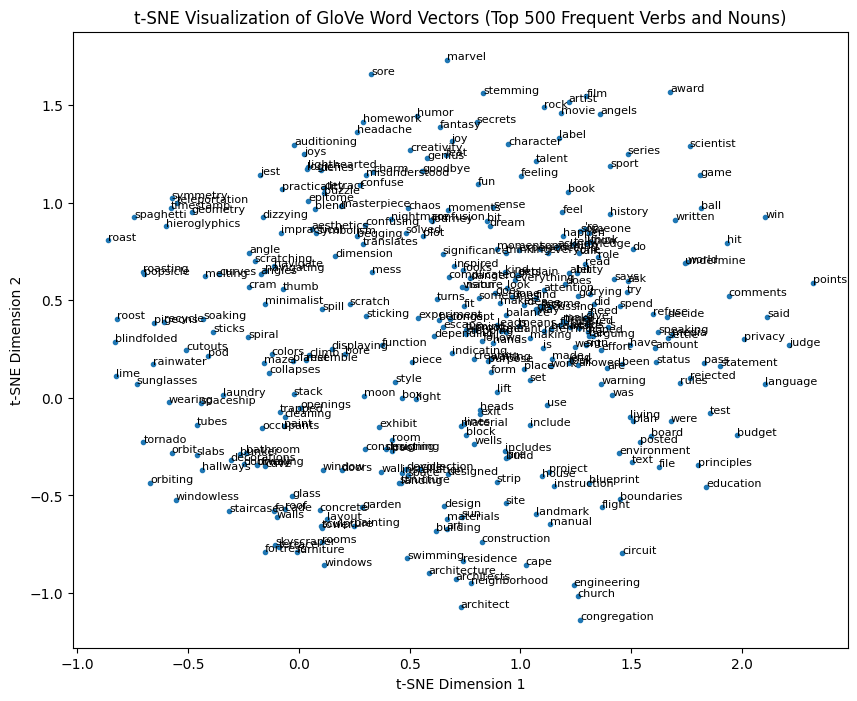

In [ ]:
!pip install nltk

import nltk
nltk.download('punkt')
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from collections import Counter

# Load pre-trained GloVe word vectors
def load_glove_vectors(glove_file):
    with open(glove_file, 'r', encoding='utf-8') as f:
        word_to_vec = {}
        for line in f:
            values = line.split()
            word = values[0]
            vec = np.array(values[1:], dtype='float32')
            word_to_vec[word] = vec
    return word_to_vec

glove_file = "/content/glove.6B.50d.txt"
word_to_vec = load_glove_vectors(glove_file)

# Read and preprocess text data
file_path = "/content/drive/MyDrive/MIT/SEM 2/Computation Design Lab/Lab 06/Muwen's Collection for the comments.txt"  # Replace with the path to your text file

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Tokenize text and filter verbs and nouns
tokens = nltk.word_tokenize(text)
verbs_and_nouns = [word for word, pos in nltk.pos_tag(tokens) if pos.startswith('VB') or pos.startswith('NN')]

# Count word frequencies
word_freq = Counter(verbs_and_nouns)

# Select top 500 frequent words
top_words = [word for word, _ in word_freq.most_common(500)]

# Filter out verbs and nouns with GloVe vectors
word_vectors = []
word_labels = []
for word in top_words:
    if word in word_to_vec:
        word_vectors.append(word_to_vec[word])
        word_labels.append(word)

# Convert to NumPy array
word_vectors = np.array(word_vectors)

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=250, learning_rate=200, n_iter=1000, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Visualize with matplotlib
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='.')
for i, word in enumerate(word_labels):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=8)
plt.title('t-SNE Visualization of GloVe Word Vectors (Top 500 Frequent Verbs and Nouns)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [ ]:
import nltk
import numpy as np
import plotly.graph_objects as go
from sklearn.manifold import TSNE
from collections import Counter

# Load pre-trained GloVe word vectors
def load_glove_vectors(glove_file):
    with open(glove_file, 'r', encoding='utf-8') as f:
        word_to_vec = {}
        for line in f:
            values = line.split()
            word = values[0]
            vec = np.array(values[1:], dtype='float32')
            word_to_vec[word] = vec
    return word_to_vec

glove_file = "/content/glove.6B.50d.txt"
word_to_vec = load_glove_vectors(glove_file)

# Read and preprocess text data
file_path = "/content/drive/MyDrive/MIT/SEM 2/Computation Design Lab/Lab 06/Muwen's Collection for the comments.txt"  # Replace with the path to your text file

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Tokenize text and filter verbs and nouns
tokens = nltk.word_tokenize(text)
verbs_and_nouns = [word for word, pos in nltk.pos_tag(tokens) if pos.startswith('VB') or pos.startswith('NN')]

# Count word frequencies
word_freq = Counter(verbs_and_nouns)

# Select top 1000 frequent words
top_words = [word for word, _ in word_freq.most_common(1000)]

# Filter out verbs and nouns with GloVe vectors
word_vectors = []
word_labels = []
for word in top_words:
    if word in word_to_vec:
        word_vectors.append(word_to_vec[word])
        word_labels.append(word)

# Convert to NumPy array
word_vectors = np.array(word_vectors)

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=3, perplexity=250, learning_rate=200, n_iter=1000, random_state=42)
word_vectors_3d = tsne.fit_transform(word_vectors)

# Visualize with Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=word_vectors_3d[:, 0],
    y=word_vectors_3d[:, 1],
    z=word_vectors_3d[:, 2],
    mode='markers+text',  # Add text to markers
    text=word_labels,  # Assign word labels to text parameter
    marker=dict(
        size=3,
        color='blue',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.3
    )
)])

fig.update_layout(
    title='t-SNE Visualization of GloVe Word Vectors (Top 1000 Frequent Verbs and Nouns)',
    scene=dict(
        xaxis_title='t-SNE Dimension 1',
        yaxis_title='t-SNE Dimension 2',
        zaxis_title='t-SNE Dimension 3'
    )
)

fig.show()


In [ ]:
#@title 3-2_Training Word2Vec
import gensim
from gensim.models import Word2Vec

# Upload your text file to Google Colab and replace "your_text_file.txt" with the file name
file_path = "/content/drive/MyDrive/MIT/SEM 2/Computation Design Lab/Lab 06/Muwen's Collection for the comments.txt"

# Read the text file
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Tokenize the text (split into words)
# You can use more advanced tokenization techniques depending on your text data
tokenized_text = [sentence.lower().split() for sentence in text.split('.')]  # Split into sentences

# Train Word2Vec model
word2vec_model = Word2Vec(tokenized_text, vector_size=256, window=5, min_count=1, workers=4, epochs=200)
word2vec_model.save("word2vec_inception.model")


# Example usage of the trained model
# similar_words = word2vec_model.wv.most_similar("machine", topn=20)
# print("Words similar to 'machine':", similar_words)



In [ ]:

# Example usage of the trained model
similar_words = word2vec_model.wv.most_similar("architecture", topn=20)
print("Words similar to 'architecture':", similar_words)


Words similar to 'architecture': [('education', 0.912708044052124), ('roasting', 0.896709144115448), ('comments', 0.8356157541275024), ('real', 0.8163953423500061), ('about', 0.8054648041725159), ('talent', 0.803932249546051), ('50', 0.7982562184333801), ('media', 0.7907816767692566), ('stemming', 0.7900390625), ('txt', 0.7869957685470581), ('effort', 0.7756887674331665), ('immense', 0.7527815103530884), ('me', 0.7476832866668701), ('file', 0.7381594777107239), ('text', 0.7295863032341003), ('roast', 0.7153127789497375), ('iconic', 0.7065659165382385), ('goes', 0.6895447373390198), ('detract', 0.6856786012649536), ('give', 0.6815652251243591)]


In [ ]:
word2vec_model.save("word2vec_inception.model")

In [ ]:
from gensim.models import Word2Vec
file_path = "/content/drive/MyDrive/MIT/SEM 2/Computation Design Lab/Lab 06/Muwen's Collection for the comments.txt"

word2vec_model_test = Word2Vec.load("word2vec_inception.model")

word_vector_run = word2vec_model_test.wv.get_vector('education')
print("Vector for 'run':", word_vector_run.shape)
print("Vector for 'run':", word_vector_run)

Vector for 'run': (256,)
Vector for 'run': [-0.1868491   0.11094709  0.05890988  0.0053062  -0.06611917 -0.00289284
  0.03222894 -0.2343341  -0.11093608  0.05043466  0.18273245 -0.25275806
  0.0377829  -0.12387916 -0.06265531  0.11175342  0.28849646 -0.11614046
 -0.20865741  0.14187662  0.14409915 -0.12238674  0.14584179 -0.0389878
 -0.37988555  0.09823356  0.07180661  0.09201168 -0.01399189  0.27262393
  0.14642109 -0.18874168  0.02156218 -0.02900545  0.15980616  0.20725113
  0.1719599  -0.00349875  0.02938007 -0.17006527 -0.21487081  0.05339079
 -0.06449397 -0.22187191  0.06022798 -0.14576097  0.27379128 -0.11600356
  0.0458511  -0.03418426 -0.23564424  0.02681757 -0.09084619  0.09355946
 -0.19091934 -0.15870535  0.10266151 -0.14312904 -0.00825245 -0.10882439
  0.08748675 -0.02296104 -0.06584945 -0.3053905   0.06160315 -0.27339053
 -0.08476658 -0.02263623 -0.24481894 -0.21909459 -0.10371347 -0.10087153
 -0.29184717 -0.14161335 -0.0461707   0.03682781  0.00391881 -0.02055847
  0.00497

In [ ]:
# print(word2vec_model_test.wv.most_similar('run'))
# print(word2vec_model_test.wv.most_similar('design'))
# print(word2vec_model_test.wv.most_similar('architecture'))

In [ ]:
import nltk
import numpy as np
import plotly.graph_objects as go
from sklearn.manifold import TSNE
from collections import Counter, defaultdict
from gensim.models import Word2Vec

# Load Word2Vec model
word2vec_model_test = Word2Vec.load("word2vec_inception.model")

# Read and preprocess text data
file_path = "/content/drive/MyDrive/MIT/SEM 2/Computation Design Lab/Lab 06/Muwen's Collection for the comments.txt"

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# Tokenize text and count word frequencies
tokens = nltk.word_tokenize(text)
word_freq = Counter(tokens)

# Filter out punctuation marks
filtered_word_freq = defaultdict(int)
for word, freq in word_freq.items():
    if word.isalnum():  # Check if the word contains only alphanumeric characters
        filtered_word_freq[word] = freq

# Select top 1000 frequent words
top_words = sorted(filtered_word_freq.items(), key=lambda x: x[1], reverse=True)[:1000]
top_words = [word for word, _ in top_words]

# Get word vectors for top words that exist in the vocabulary
word_vectors = []
word_labels = []  # List to store labels for each word
for word in top_words:
    try:
        vector = word2vec_model_test.wv.get_vector(word)
        word_vectors.append(vector)
        word_labels.append(word)  # Store the word as label
    except KeyError:
        pass  # Ignore words not present in the vocabulary

# Convert to NumPy array
word_vectors = np.array(word_vectors)

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=3, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
word_vectors_3d = tsne.fit_transform(word_vectors)

# Create trace for scatter plot
trace = go.Scatter3d(
    x=word_vectors_3d[:, 0],
    y=word_vectors_3d[:, 1],
    z=word_vectors_3d[:, 2],
    mode='markers+text',
    text=word_labels,  # Assign word labels to text parameter
    marker=dict(
        size=5,
        color='blue',  # set color to an array/list of desired values
        colorscale='Viridis',  # choose a colorscale
        opacity=0.2
    ),
    textposition='middle center'  # Position the text at the middle of the markers
)

# Add annotations to the layout
layout = go.Layout(
    title='t-SNE Visualization of Word Vectors (Top 1000 Frequent Words)',
    scene=dict(
        xaxis_title='t-SNE Dimension 1',
        yaxis_title='t-SNE Dimension 2',
        zaxis_title='t-SNE Dimension 3'
    )
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show plot
fig.show()


In [ ]:
#@title 3-3_CLIP: Connecting text and images

! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git
import numpy as np
import torch
from pkg_resources import packaging
print("Torch version:", torch.__version__)



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.3 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-evuye55h
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-evuye55h
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
import clip
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [ ]:
model, preprocess = clip.load("ViT-B/32")
#model.cuda().eval()
model.eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


In [ ]:
clip.tokenize("Architecture")

In [ ]:
clip.tokenize("Architecture is Creation")

In [ ]:
# content_string="Flexibility is a key consideration. We design with an awareness that circumstances will change – that a building’s context will evolve"
# print(len(content_string))
# clip.tokenize(content_string)

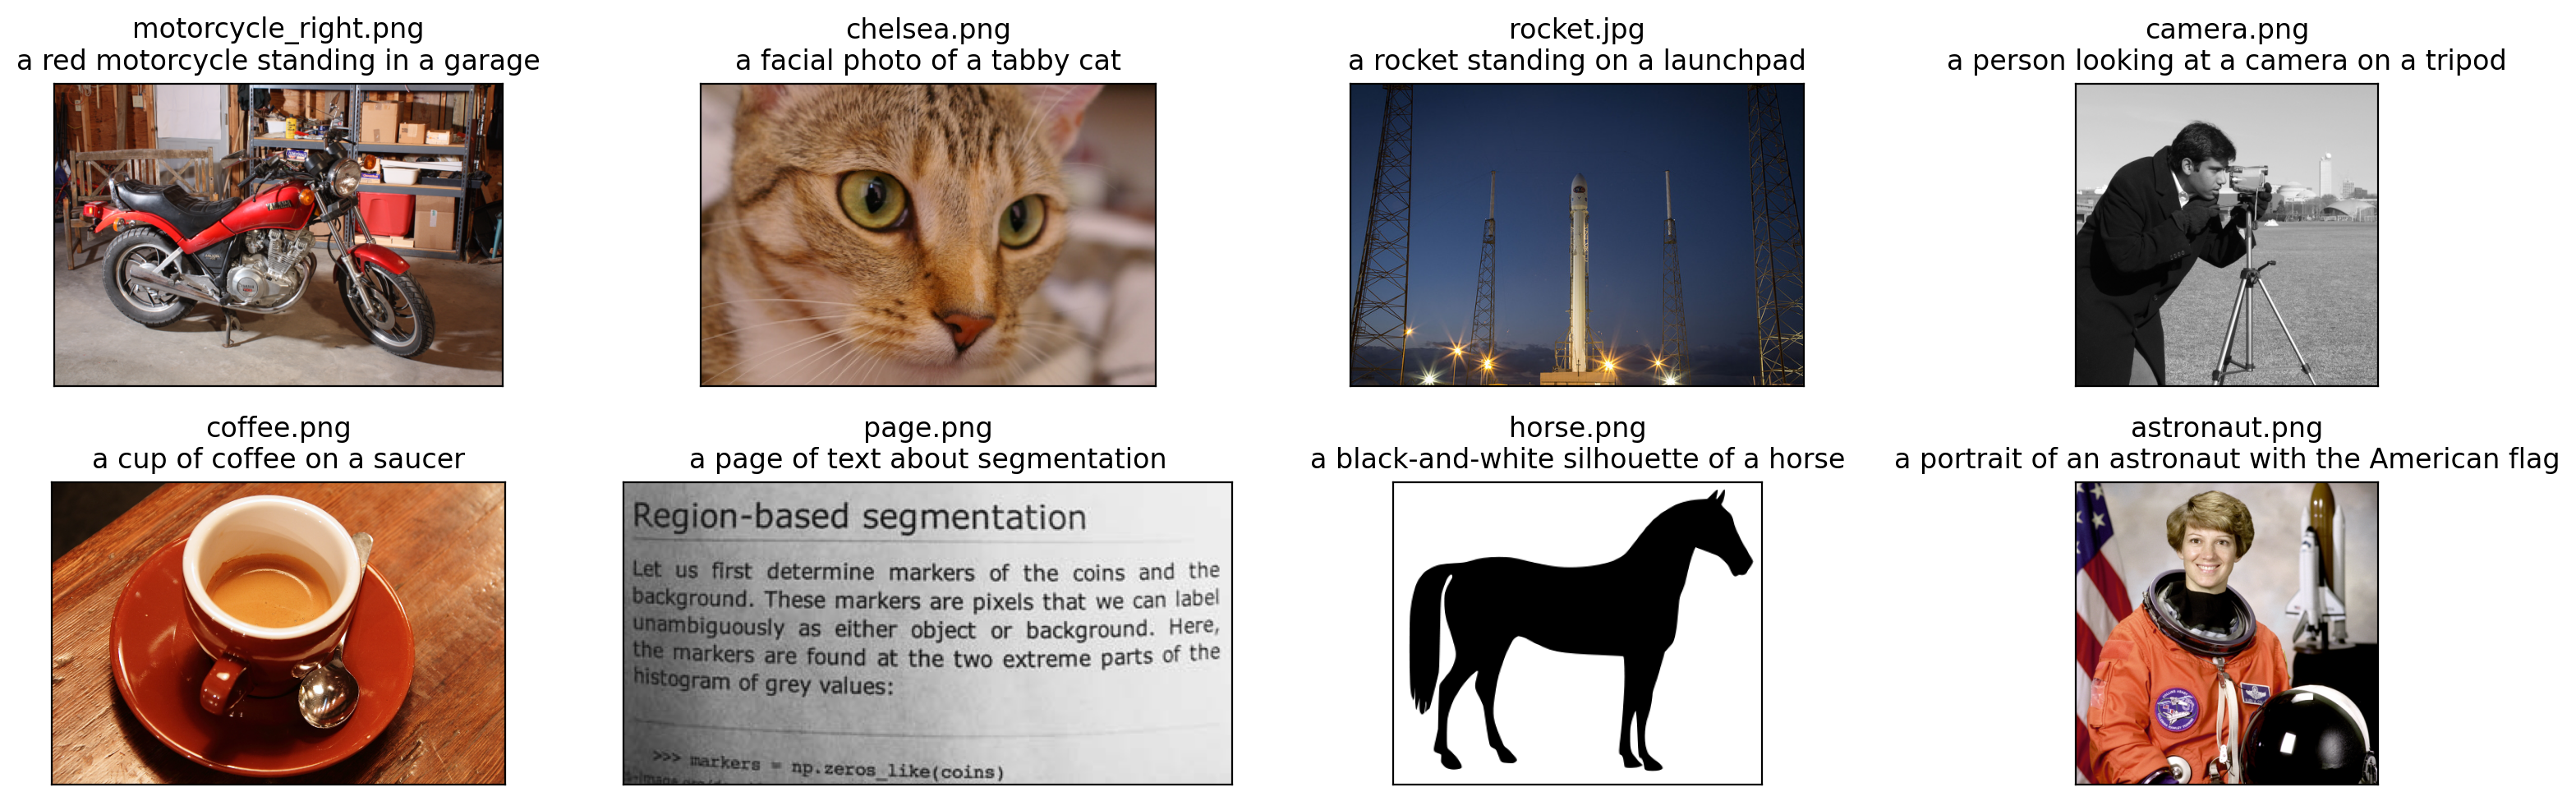

In [ ]:
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# images in skimage to use and their textual descriptions
descriptions = {
    "page": "a page of text about segmentation",
    "chelsea": "a facial photo of a tabby cat",
    "astronaut": "a portrait of an astronaut with the American flag",
    "rocket": "a rocket standing on a launchpad",
    "motorcycle_right": "a red motorcycle standing in a garage",
    "camera": "a person looking at a camera on a tripod",
    "horse": "a black-and-white silhouette of a horse",
    "coffee": "a cup of coffee on a saucer"
}
original_images = []
images = []
texts = []
plt.figure(figsize=(16, 5))

for filename in [filename for filename in os.listdir(skimage.data_dir) if filename.endswith(".png") or filename.endswith(".jpg")]:
    name = os.path.splitext(filename)[0]
    if name not in descriptions:
        continue

    image = Image.open(os.path.join(skimage.data_dir, filename)).convert("RGB")

    plt.subplot(2, 4, len(images) + 1)
    plt.imshow(image)
    plt.title(f"{filename}\n{descriptions[name]}")
    plt.xticks([])
    plt.yticks([])

    original_images.append(image)
    images.append(preprocess(image))
    texts.append(descriptions[name])

plt.tight_layout()

image_features: torch.Size([8, 512])
text_features: torch.Size([8, 512])


Text(0.5, 1.0, 'Cosine similarity between text and image features')

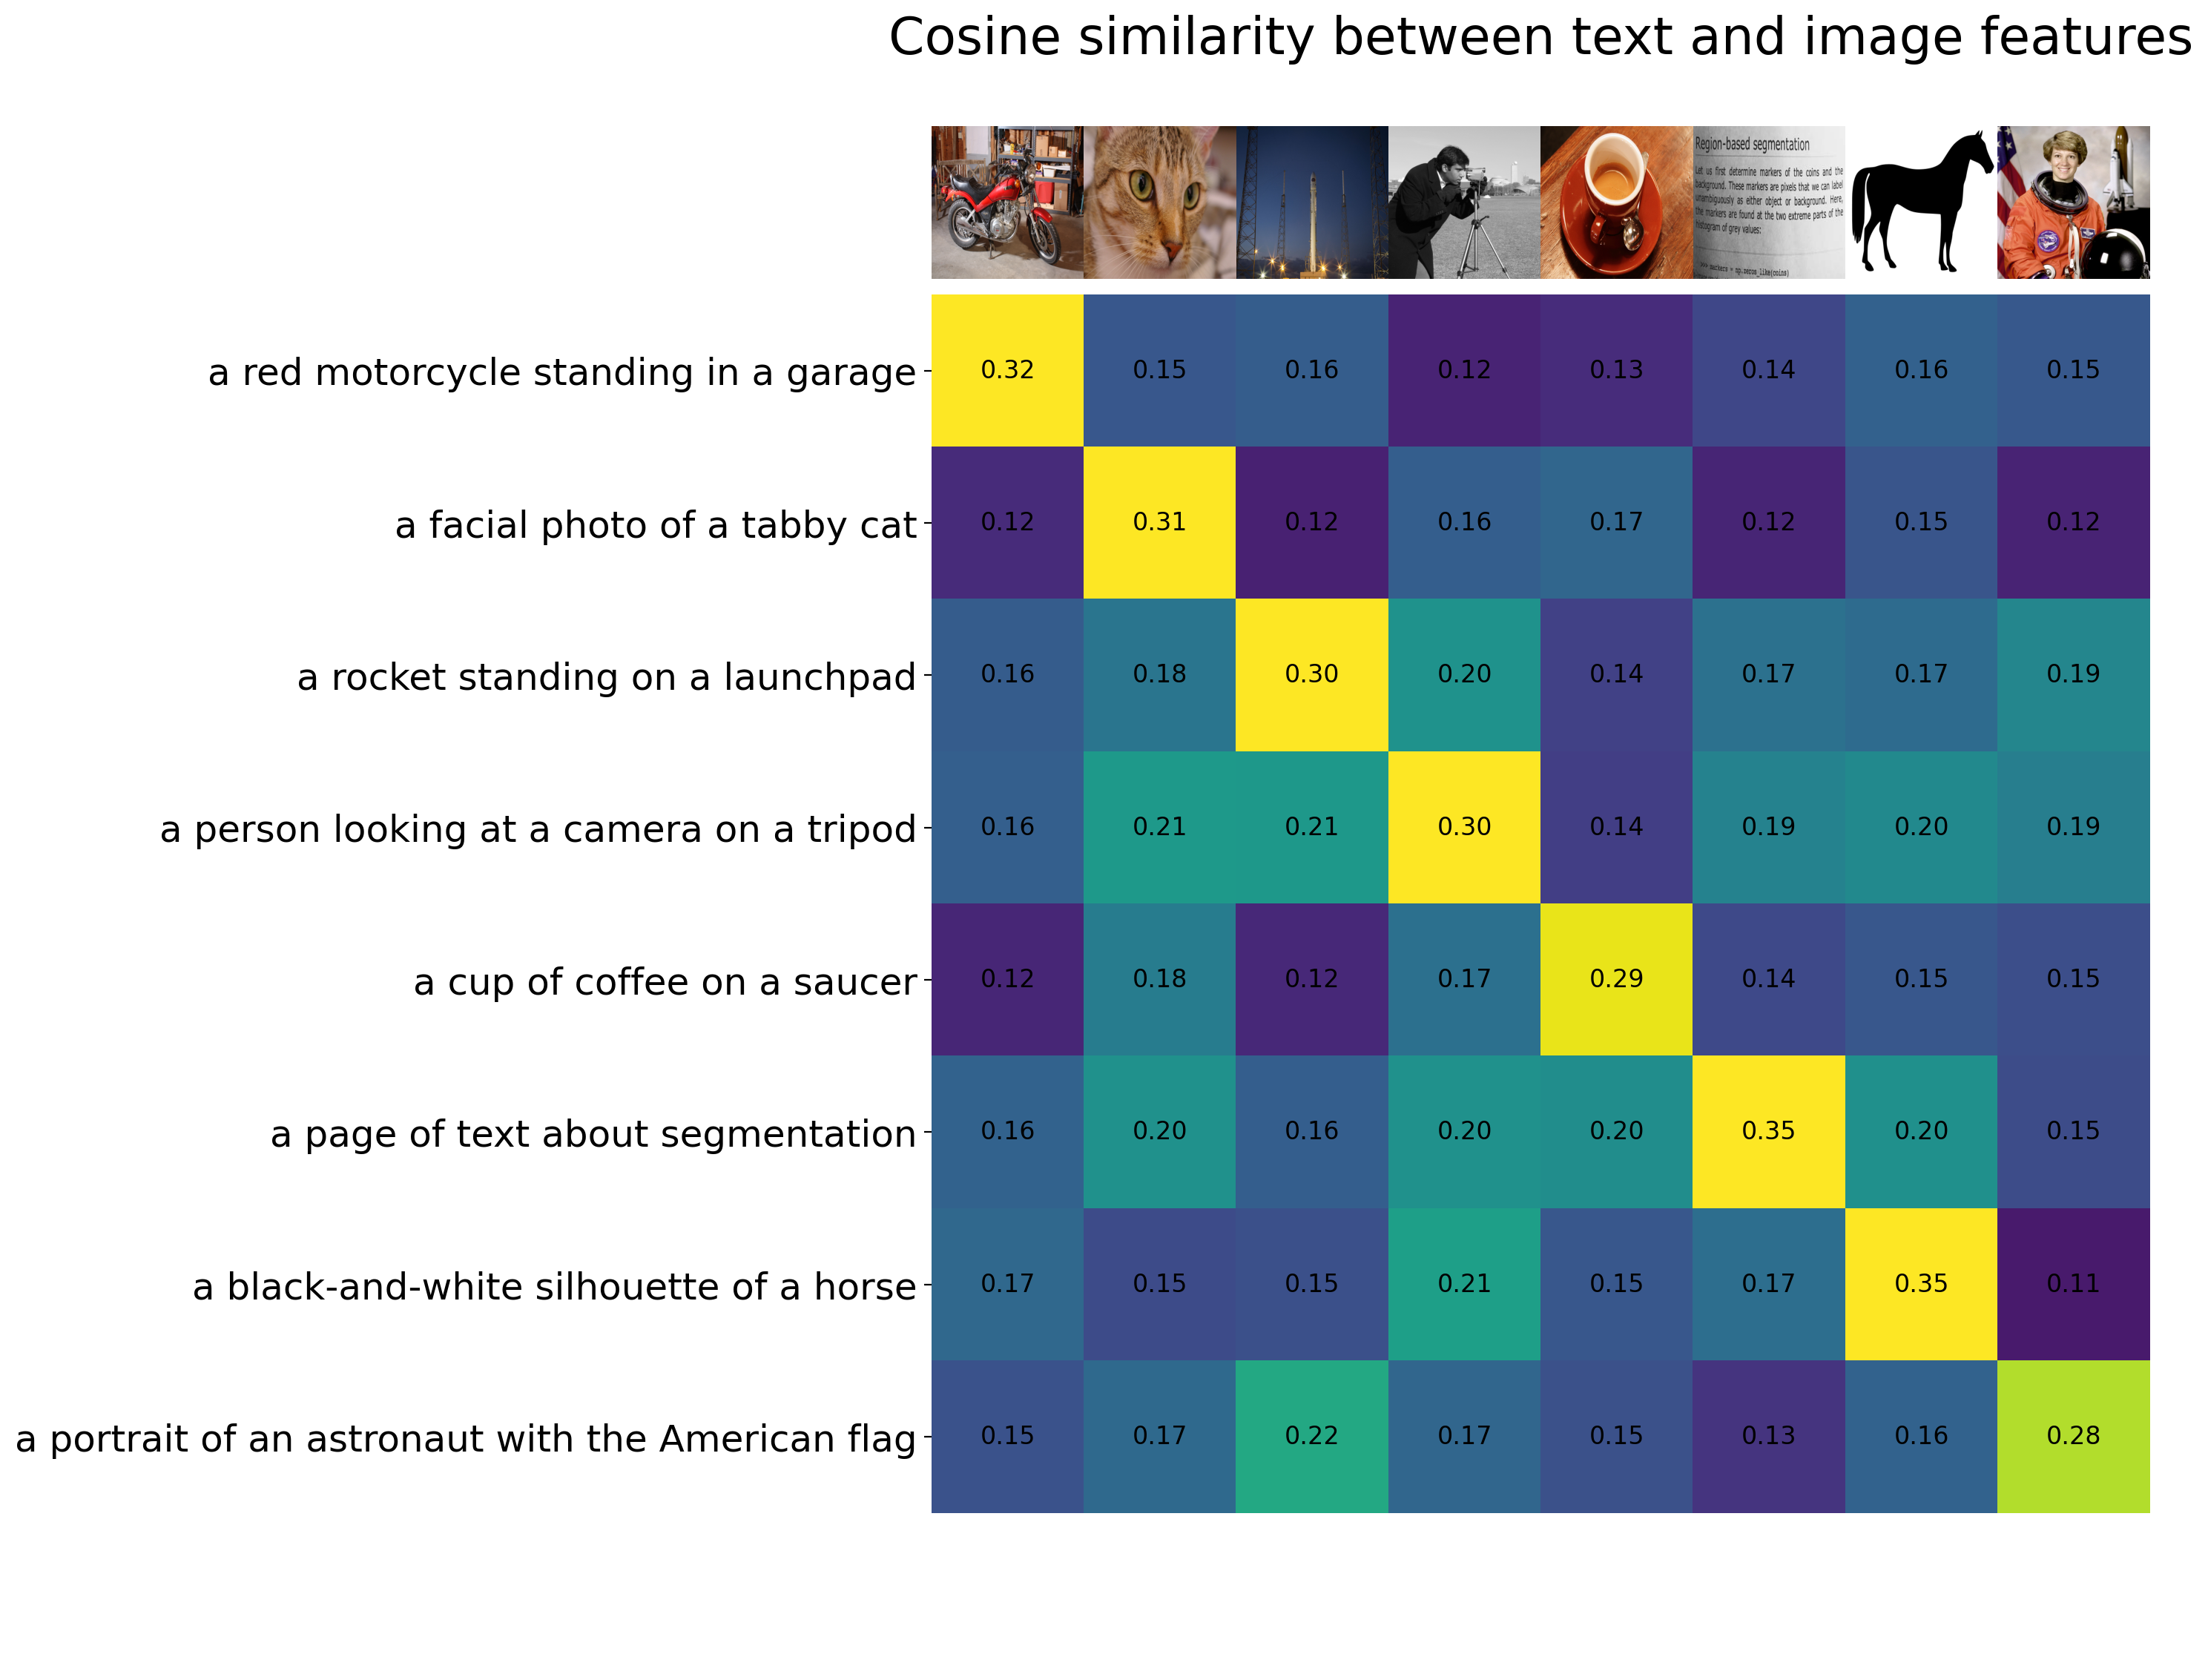

In [ ]:
#image_input = torch.tensor(np.stack(images)).cuda()
#text_tokens = clip.tokenize(["This is " + desc for desc in texts]).cuda()
image_input = torch.tensor(np.stack(images))
text_tokens = clip.tokenize(["This is " + desc for desc in texts])

with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_tokens).float()

print("image_features:",image_features.shape)
print("text_features:",text_features.shape)

image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T
count = len(descriptions)

plt.figure(figsize=(20, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.3)
# plt.colorbar()
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])
for i, image in enumerate(original_images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

plt.title("Cosine similarity between text and image features", size=25)

image_features: torch.Size([8, 512])
text_features: torch.Size([8, 512])


Text(0.5, 1.0, 'Cosine similarity between text and text features')

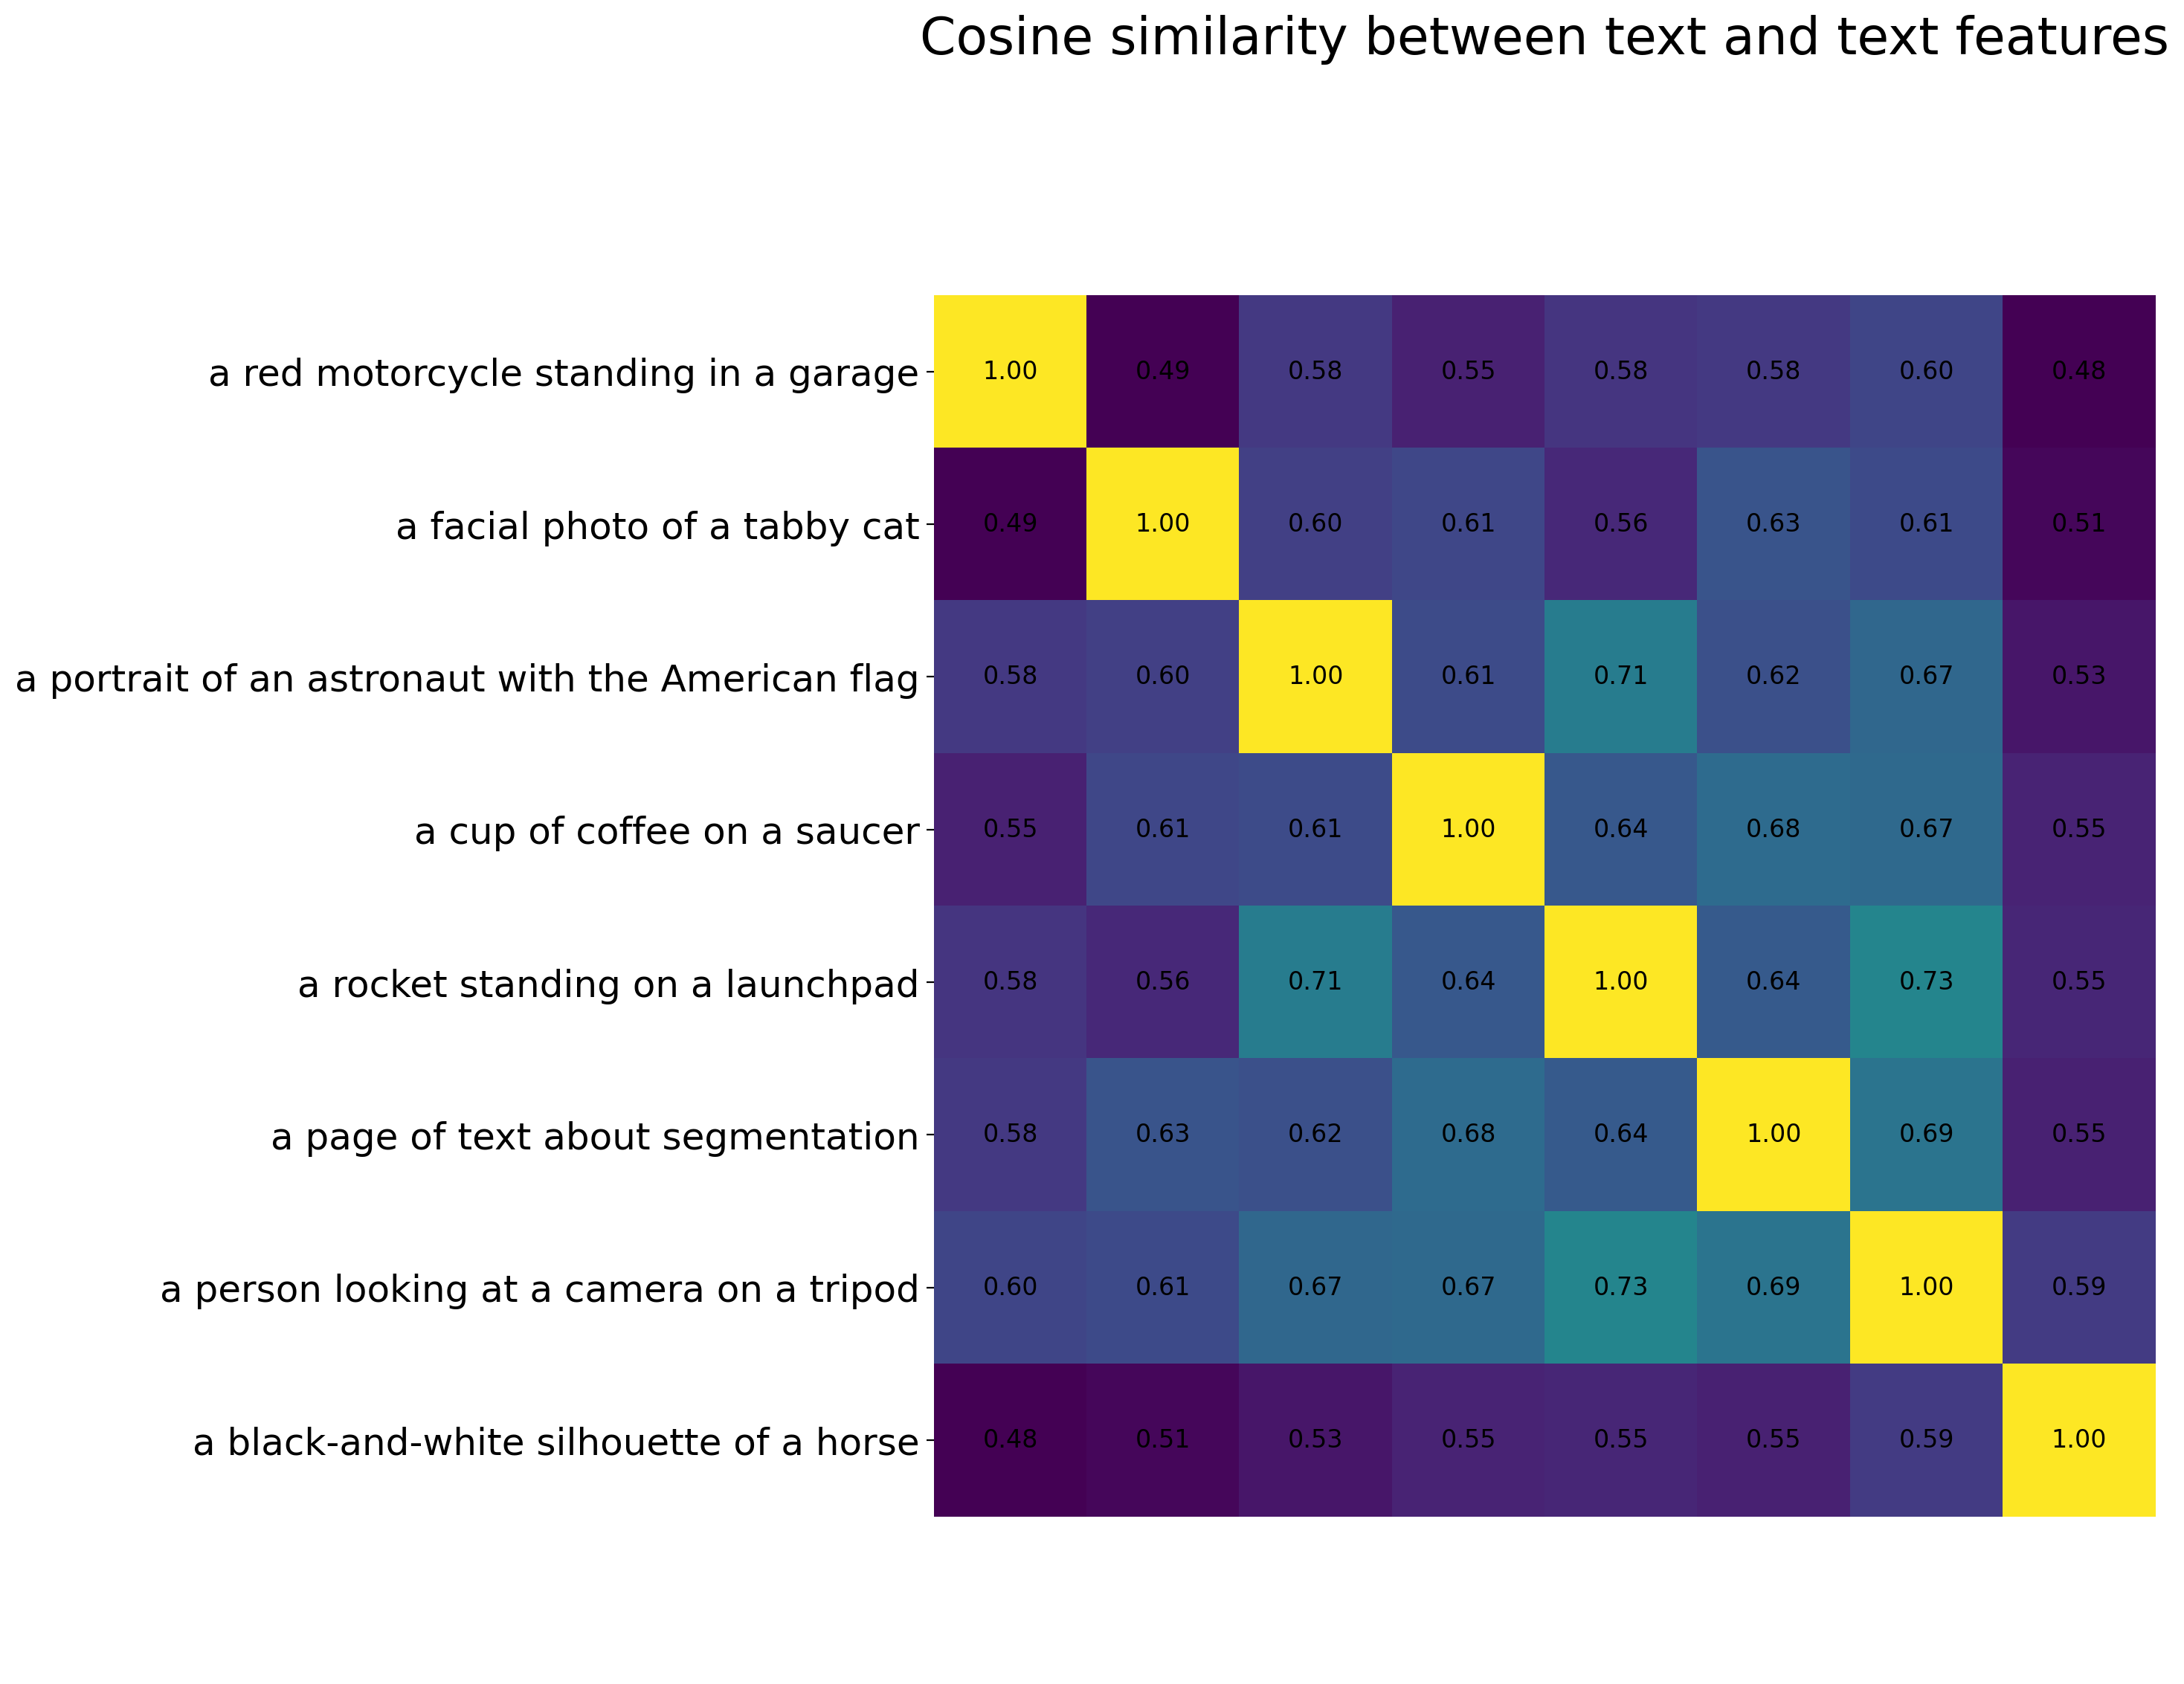

In [ ]:

text_features0=text_features
text_features1=text_features

print("image_features:",image_features.shape)
print("text_features:",text_features.shape)



text_features0 /= text_features0.norm(dim=-1, keepdim=True)
text_features1 /= text_features1.norm(dim=-1, keepdim=True)

similarity = text_features0.cpu().numpy() @ text_features1.cpu().numpy().T
count = len(descriptions)

plt.figure(figsize=(20, 14))
plt.imshow(similarity, vmin=0.5, vmax=1)
# plt.colorbar()
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])
"""
for i, image in enumerate(original_images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
"""
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

plt.title("Cosine similarity between text and text features", size=25)

image_features0: torch.Size([8, 512])
image_features1: torch.Size([8, 512])


Text(0.5, 1.0, 'Cosine similarity between image and image features')

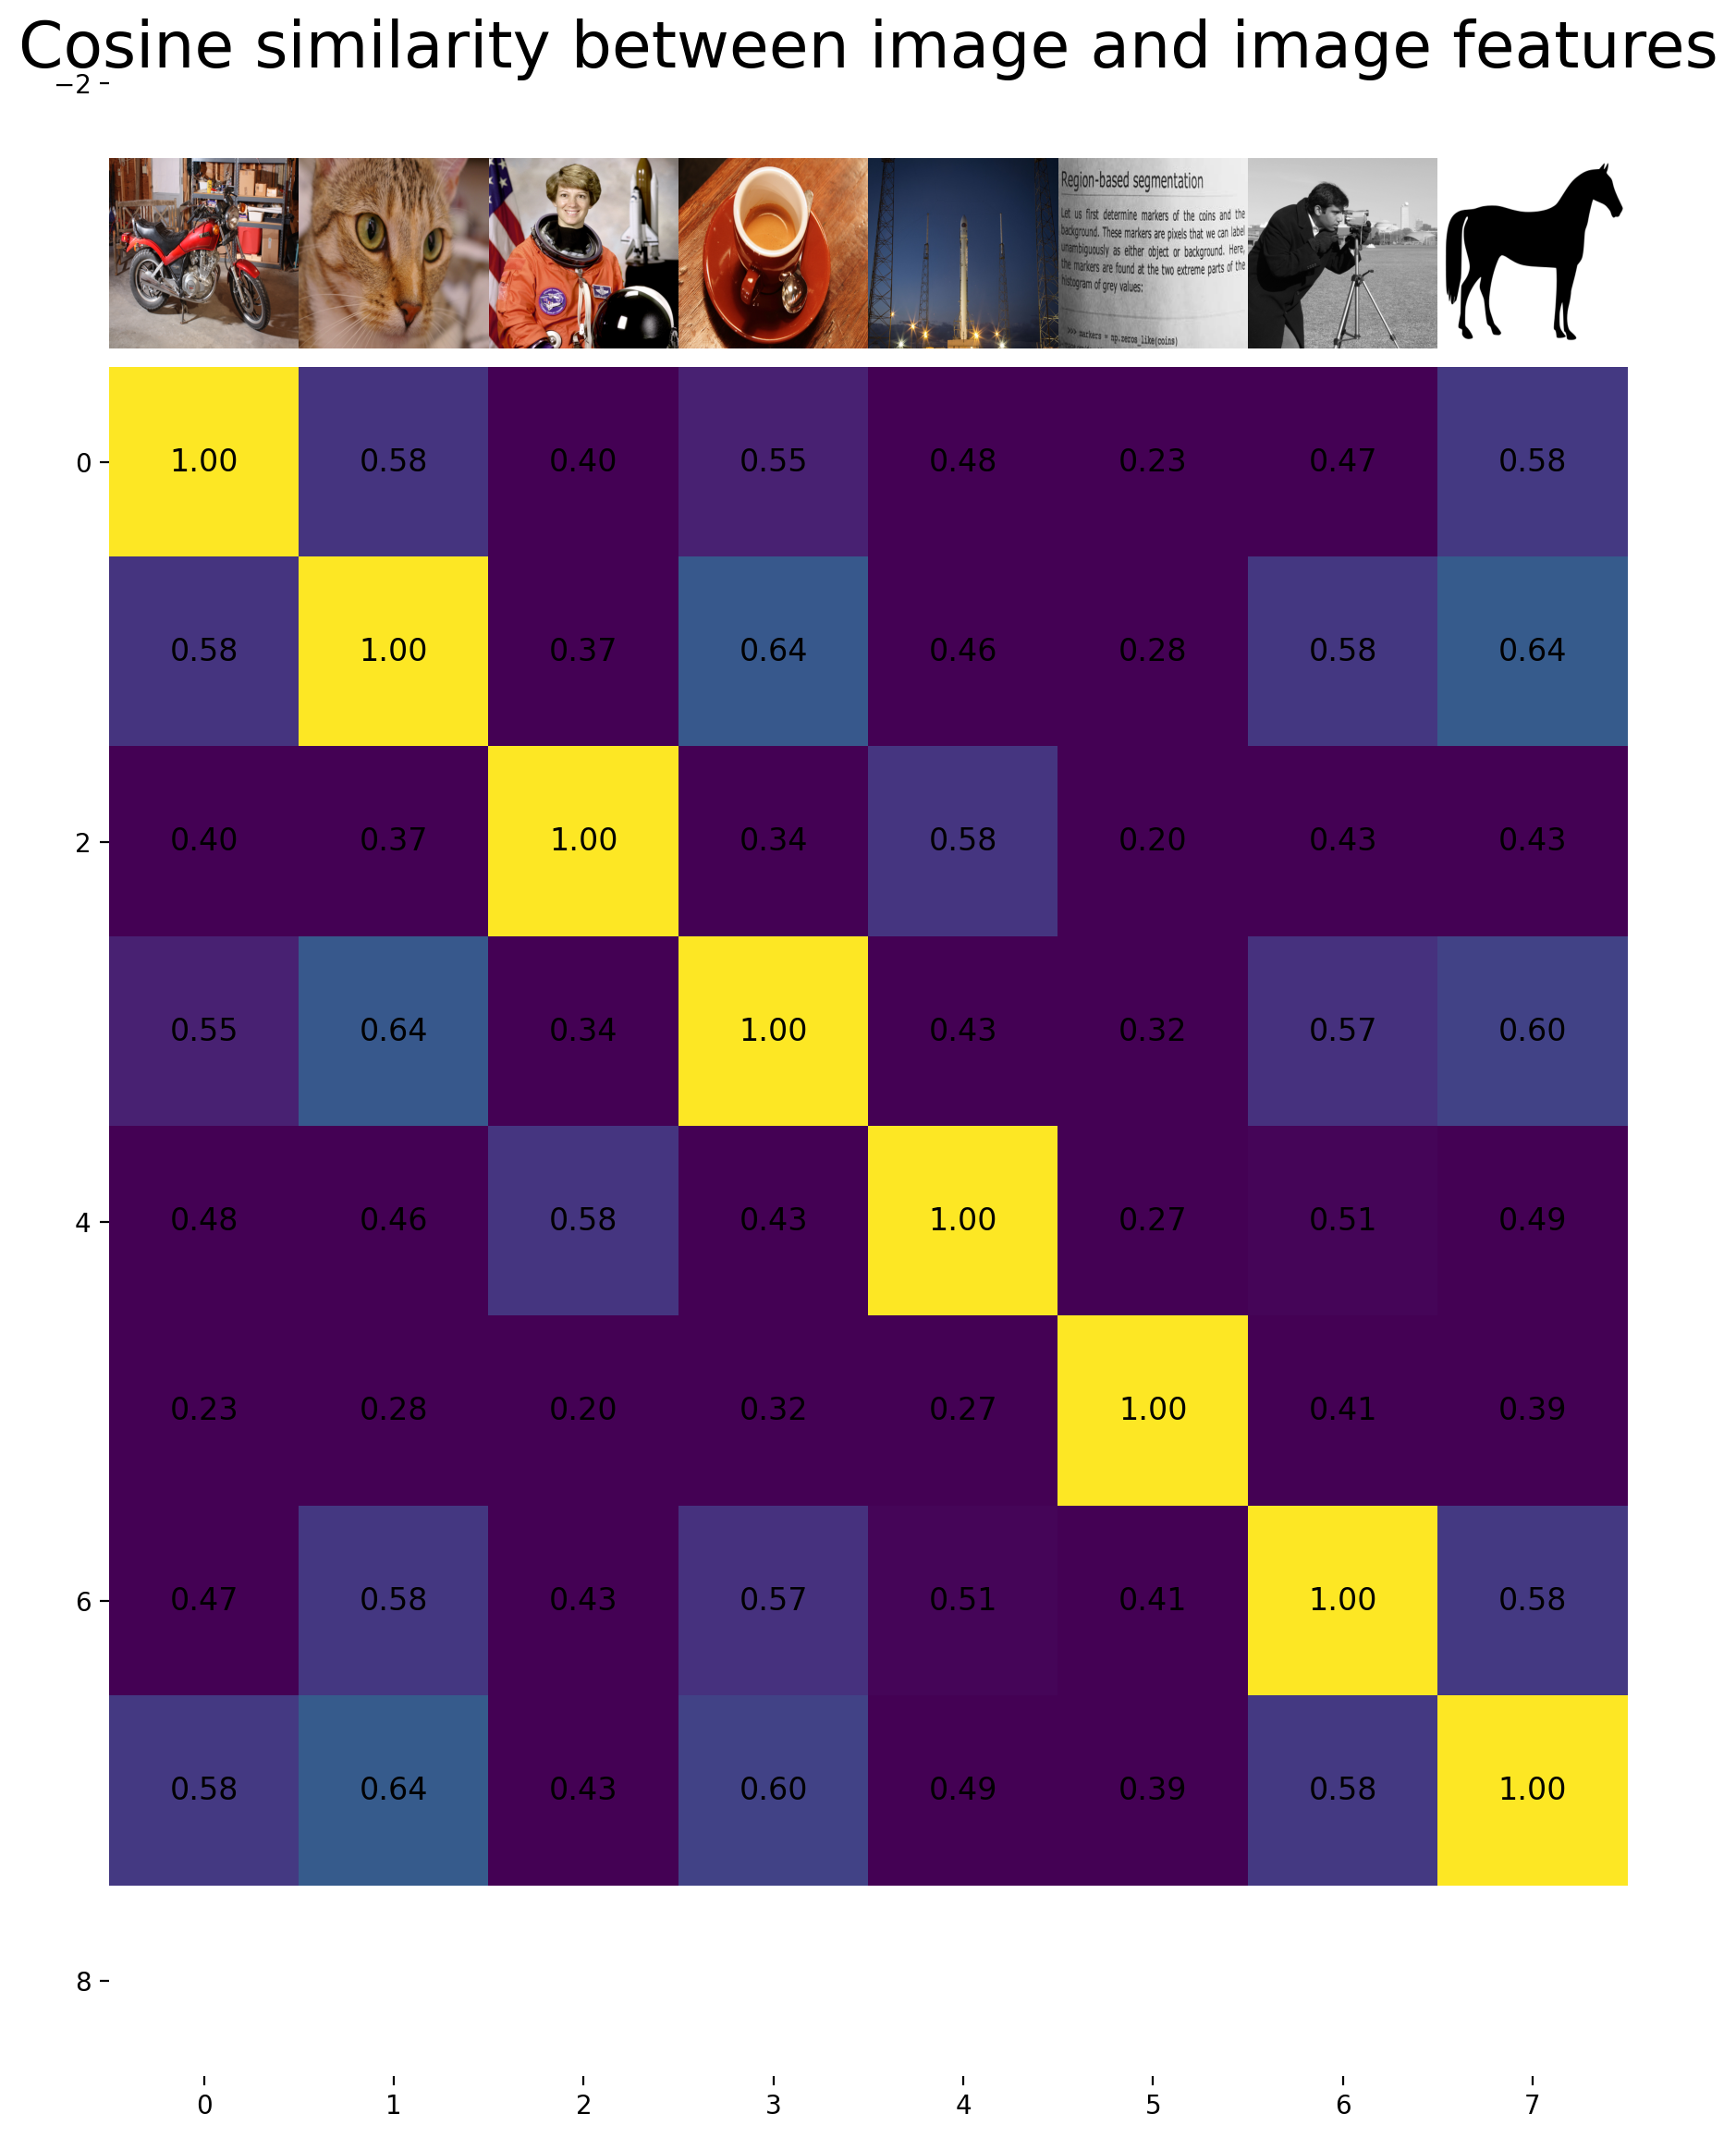

In [ ]:

image_features0=image_features
image_features1=image_features

print("image_features0:",image_features0.shape)
print("image_features1:",image_features1.shape)


image_features0 /= image_features0.norm(dim=-1, keepdim=True)
image_features1 /= image_features1.norm(dim=-1, keepdim=True)


similarity = image_features0.cpu().numpy() @ image_features1.cpu().numpy().T
count = len(descriptions)


plt.figure(figsize=(20, 14))
plt.imshow(similarity, vmin=0.5, vmax=1)
# plt.colorbar()
"""
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])
"""
for i, image in enumerate(original_images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")

for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)


for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

plt.title("Cosine similarity between image and image features", size=25)

In [ ]:
import re

def clean_tweet(tweet):
    # Remove dates in the format MM/DD/YYYY or YYYY/MM/DD
    tweet = re.sub(r'\b(?:\d{1,2}[-/]\d{1,2}[-/]\d{4}|\d{4}[-/]\d{1,2}[-/]\d{1,2})\b', '', tweet)

    # Remove serial numbers (assuming they are alphanumeric and have a fixed length, e.g., 10 characters)
    tweet = re.sub(r'\b[A-Za-z0-9]{10}\b', '', tweet)

    # Remove time in the format HH:MM:SS or HH:MM
    tweet = re.sub(r'\b\d{1,2}:\d{2}(?::\d{2})?\b', '', tweet)

    return tweet

# Example usage
tweets = [
    "Tweet 1: 12/31/2023 This is a test tweet. Serial: ABCDE12345 Time: 14:30:00",
    "Tweet 2: Another tweet with date 2023-12-31 and time 14:30.",
    "Tweet 3: No date or time here, just text.",
    "Tweet 4: Serial number XYZ7891011 and time 09:00 in this tweet."
]

cleaned_tweets = [clean_tweet(tweet) for tweet in tweets]
for i, tweet in enumerate(cleaned_tweets):
    print(f"{tweet}")

Tweet 1:  This is a test tweet. Serial:  Time: 
Tweet 2: Another tweet with date  and time .
Tweet 3: No date or time here, just text.
Tweet 4: Serial number  and time  in this tweet.


In [ ]:
#@title ___Architecture_Quotes to CLIP Embeddings
# architecture_quotes = [
#     "Less is more.",
#     "God is in the details.",
#     "Form follows function.",
#     "Architecture is the will of an epoch translated into space.",
#     "A building has two lives. The one imagined by its maker and the life it lives afterward.",
#     "Space has always been the spiritual dimension of architecture.",
#     "Architecture is the learned game of forms assembled in the light.",
#     "To create, one must first question everything.",
#     "Good buildings come from good people.",
#     "Architecture is a visual art, and the buildings speak for themselves.",
#     "The mother art is architecture.",
#     "Architecture starts when you carefully put two bricks together.",
#     "You can't just let nature run wild.",
#     "The sun never knew how great it was until it hit the side of a building.",
#     "Architecture is the reaching out for the truth.",
#     "I don’t build to have clients. I have clients to build.",
#     "Architecture should speak of its time and place.",
#     "Buildings should serve people, not the other way around.",
#     "The door handle is the handshake of the building.",
#     "Simplicity is the ultimate sophistication.",
#     "Every building is a prototype. No two are alike.",
#     "The line between disorder and order lies in logistics.",
#     "Architecture is inhabited sculpture.",
#     "Building should be good citizens.",
#     "I have no idea what to say about architecture.",
#     "When we build, let us think that we build forever.",
#     "An idea is salvation by imagination.",
#     "A room is not a room without natural light.",
#     "Design is a plan for arranging elements in such a way as best to accomplish a particular purpose.",
#     "In architecture, you should live for 150 years, because you are always living in the future.",
#     "Make big plans; aim high in hope and work.",
#     "The best investment on earth is earth.",
#     "A great architect is not made by way of a brain nearly so much as he is made by way of a cultivated, enriched heart.",
#     "Nothing requires the architect’s care more than the due proportions of buildings.",
#     "There is no place in the world that can't be improved.",
#     "The greatest architectural illusion is not Baroque fancy or Victorian flamboyant, but minimalism.",
#     "Life is architecture, and architecture is the mirror of life.",
#     "People ignore design that ignores people.",
#     "Architecture is the art of how to waste space.",
#     "Architecture aims at eternity.",
#     "Every great architect is necessarily a great poet.",
#     "The ultimate goal of architecture is to create a paradise. Every house, every product of architecture should be a fruit of our endeavor to build an earthly paradise for people.",
#     "Architecture is really about well-being. I think that people want to feel good in a space.",
#     "An architect's most useful tools are an eraser at the drafting board and a wrecking bar at the site.",
#     "Good architecture lets nature in.",
#     "The modern architect is, generally speaking, art's greatest enemy.",
#     "Architecture begins where engineering ends.",
#     "Every building must have its own soul.",
#     "I'm so tired.",
#     "Architecture is a science arising out of many other sciences, and adorned with much and varied learning.",
#     "By building well, you enrich a city, not just a building.",
#     "In architecture the pride of man, his triumph over gravitation, his will to power, assume visible form. Architecture is a symbol of the human spirit."
# ]
architecture_quotes = [
"Looks like the architect went a bit overboard with the concrete. It's a church, not a bunker!",
"Ah, the Ranchamp Church, where the congregation can feel closer to God while simultaneously feeling like they're trapped in a minimalist maze.",
"When Le Corbusier said 'less is more,' he must have been referring to the amount of natural light allowed into this fortress of a church.",
"Who needs stained glass windows when you can have giant, impenetrable concrete slabs instead?",
"Ranchamp Church: Where even the angels would need a GPS to find their way in.",
"Villa Savoye: where form definitely follows function... maybe a bit too much. It's like living in a minimalist art installation.",
"Who needs privacy when you have all those windows? Say goodbye to any secrets in the Villa Savoye!",
"Ah, the epitome of modernist living: where the roof terrace is great for soaking up the sun... and also for displaying your laundry to the entire neighborhood.",
"Le Corbusier's Villa Savoye: where the sleek design makes cleaning feel like an extreme sport.",
"Living in the Villa Savoye: the ultimate test of your ability to balance minimalist aesthetics with the need for actual furniture.",
"Looks like the architect took 'thinking outside the box' a bit too literally. Maybe they should've tried thinking inside the budget instead.",
"This building is proof that even architects have 'oops' moments. It's like they designed it blindfolded and hoped for the best!",
"Congratulations to the architect for turning a simple construction project into a modern art installation. Shame it's not functional.",
"When you ask for a contemporary design and the architect hands you a stack of geometry homework instead.",
"Who needs a fire exit when you have this avant-garde maze of hallways? The perfect blend of danger and design!",
"Architectural marvel or just a giant concrete block? You be the judge!",
"Who needs windows when you have a solid wall of 'modernist charm'?",
"If the building looks like it's melting, it's probably just modern art... or poor construction.",
"Remember, every building is just a fancy box with fancy decorations.",
"That moment when your house looks more like a Rubik's Cube than a cozy dwelling.",
"When you spend more time arguing over paint colors than actually designing the building.",
"Congrats to the architect for turning a simple structure into a 'What in the world is that?'",
"Architecture: Where 'form follows function' sometimes translates to 'function follows fantasy.'",
"When the building's blueprint looks more like a Rorschach test than a plan.",
"Sure, it's a 'green' building, but can we talk about its brown aesthetic?",
"Who needs doors when you can just climb through the windowless openings?",
"Ah, the joy of designing a building that's as confusing to navigate as it is to explain.",
"When your dream house looks more like a nightmare from an Escher painting.",
"Hats off to the architect for making the skyscraper resemble a Jenga tower.",
"Architectural genius or an accidental spill of concrete? You decide.",
"When the architect gets a little too inspired by Tetris for the building's layout.",
"Is it just me, or does that building look like it's trying to escape its own design?",
"When you try to make a statement with your building but end up making everyone scratch their heads instead.",
"Why settle for one architectural style when you can cram them all into one building?",
"Sure, it's sustainable, but can we talk about its complete lack of charm?",
"Congrats to the architect for turning a simple staircase into a feat of engineering... and a headache for the occupants.",
"When your building's facade looks like it's auditioning for a role in a sci-fi movie.",
"They said 'less is more,' but I think they misunderstood and went for 'less is a bore.'",
"Architecture: Where 'open concept' sometimes means 'where did all the walls go?'",
"Kudos to the architect for turning a construction site into a modernist masterpiece... or a mess, depending on who you ask.",
"When the architect's vision is so avant-garde, even the pigeons refuse to roost.",
"Who needs natural light when you can have an endless series of fluorescent tubes instead?",
"When your building's design is so out there, it's practically in orbit.",
"Architecture: Where 'sustainability' often means 'how long can we recycle this trendy material?'",
"That awkward moment when the building's exterior looks more like a circuit board than a place of residence.",
"Architectural marvel or just an elaborate game of 'let's see how many angles we can fit into one structure'?",
"When you try to blend in with the environment but end up sticking out like a sore thumb.",
"Congrats to the architect for creating a building that's both visually striking and utterly impractical.",
"Who needs a roof when you can have a 'sky garden' instead? Bonus points for rainwater collection!",
"When the building's design is so edgy, it's practically sharp.",
"Sure, it's a 'smart' building, but can it pass the basic common sense test?",
"Architecture: Where 'going green' sometimes means 'painting everything lime.'",
"Congrats to the architect for turning a simple staircase into a dizzying spiral of confusion.",
"When you spend more time discussing the symbolism of your building than actually constructing it.",
"Who needs symmetry when you can have asymmetrical chaos?",
"Architecture: Where 'minimalism' often means 'how much can we strip away before it collapses?'",
"Architecture: Where every building is a potential game of architectural Tetris. #JustStackingBlocks",
"Who needs functional space when you can have a 'modernist sculpture' instead? #FormOverFunction",
"Is it a building or a contemporary art installation? Sometimes it's hard to tell. #ArtOrArchitecture",
"When your house looks more like a geometric experiment gone wrong. #GeometryGoneWild",
"Ah, the joy of navigating a building that defies all logic. #LostInArchitecture",
"That moment when the building's design is so avant-garde, it should come with a warning label. #ProceedWithCaution",
"Congrats to the architect for turning a simple doorway into a philosophical journey. #DoorsOfPerception",
"Architecture: Where 'less is more' sometimes means 'less is a headache.' #MinimalismMistakes",
"Who needs practicality when you can have a building that looks like a giant puzzle waiting to be solved? #ArchitecturalPuzzles",
"When the building's design is so abstract, it's practically speaking its own language. #LostInTranslation",
"Is it a building or a conceptual art piece? The world may never know. #Artitecture",
"Ah, the joys of living in a building that looks like it was designed by a mad scientist. #ArchitecturalExperiment",
"Congrats to the architect for creating a building that's as confusing as a Rubik's Cube. #PuzzleArchitecture",
"Architecture: Where 'functional' often means 'how many weird angles can we fit into one room?' #AnglesGalore",
"Who needs windows when you can have abstract cutouts that let in just the right amount of light? #WindowlessWonders",
"When the architect's vision is so bold, it's practically wearing sunglasses. #ArchitecturalShades",
"Is it just me, or does that building look like it's about to take flight? #FlyingArchitecture",
"Congrats to the architect for turning a simple staircase into a dizzying journey to the unknown. #StairwayToWhere",
"That moment when your house looks more like a giant sculpture than a livable space. #LivingArt",
"Architecture: Where 'simplicity' sometimes means 'let's make it as complicated as possible.' #SimpleComplexity",
"Who needs straight lines when you can have a building that looks like a wavy dream? #CurvyArchitecture",
"When the building's design is so futuristic, it's practically from another dimension. #ArchitecturalAlien",
"Congrats to the architect for creating a building that's more maze than structure. #LostInDesign",
"Architecture: Where 'unique' often means 'completely off-the-wall.' #UniquelyBizarre",
"That awkward moment when your house looks like a rejected set piece from a sci-fi movie. #RejectedDesigns",
"Is it just me, or does that building look like it's trying too hard to be 'edgy'? #TryingTooHard",
"Ah, the joy of living in a building that looks like it's from a dystopian future. #DystopiaLiving",
"When the architect's idea of 'functional space' includes a room with no discernible purpose. #FunctionalityFail",
"Congrats to the architect for turning a simple window into a work of modern art. #WindowWonder",
"Architecture: Where 'ordinary' is never in the vocabulary. #ExtraordinaryDesigns",
"Who needs privacy when you can have a building with walls made entirely of glass? #GlassHouses",
"When the building's design is so avant-garde, it's practically begging for attention. #LookAtMe",
"Congrats to the architect for creating a building that's both visually striking and utterly confusing. #StrikinglyConfusing",
"That awkward moment when your house looks like a giant game of architectural Jenga. #ArchitecturalJenga",
"Architecture: Where 'functional space' sometimes means 'let's see how many rooms we can fit into this space.' #FunctionallyCrowded",
"Who needs practicality when you can have a building that looks like a futuristic spaceship? #SpaceshipLiving",
"Is it just me, or does that building look like it's been designed by someone who's never seen a right angle? #NoRightAngles",
"When the building's design is so abstract, it's practically a work of modern art. #AbstractArchitecture",
"Congrats to the architect for turning a simple doorway into a journey through time and space. #Door",
"Architecture: Where every blueprint is a potential headache waiting to happen. #BlueprintBlunders",
"Who needs functional space when you can have a 'modernist nightmare' instead? #FormOverFunctionFail",
"Is it a building or an abstract art piece? Even the architects can't decide. #ArtitectureConfusion",
"When your house looks more like a geometry experiment gone awry. #GeometryGoneWrong",
"Ah, the joy of navigating a building that defies all logical design principles. #LostInDesign",
"That moment when the building's design is so avant-garde, it should come with a warning label. #ProceedWithCaution",
"Congrats to the architect for turning a simple doorway into a philosophical journey. #DoorsOfPerception",
"Architecture: Where 'minimalism' often means 'let's see how few walls we can use.' #MinimalismMissteps",
"Who needs practicality when you can have a building that's a maze of confusion? #ArchitecturalPuzzles",
"When the building's design is so abstract, it's like trying to read hieroglyphics. #LostInTranslation",
"Is it a building or a contemporary sculpture? Sometimes it's hard to tell. #BuildingOrArt",
"Ah, the joys of living in a building that looks like it was designed by a chaotic artist. #ChaosArchitecture",
"Congrats to the architect for creating a building that's as confusing as a Rubik's Cube. #ArchitecturalPuzzle",
"Architecture: Where 'functionality' sometimes means 'let's see how many odd angles we can include.' #AnglesGalore",
"Who needs windows when you can have abstract cutouts that let in just enough light to confuse? #WindowlessWonders",
"When the architect's vision is so bold, it's practically wearing a neon sign. #BoldArchitecture",
"Is it just me, or does that building look like it's about to lift off into space? #ArchitectureToTheMoon",
"Congrats to the architect for turning a simple staircase into a vertigo-inducing nightmare. #StairwayToConfusion",
"That moment when your house looks more like a modern art exhibit than a livable space. #LivingArt",
"Architecture: Where 'simplicity' often means 'let's make it as complicated as possible.' #SimpleComplexity",
"Who needs straight lines when you can have a building that's all curves? #CurvyArchitecture",
"When the building's design is so futuristic, it's like stepping into a sci-fi movie. #FuturisticFails",
"Congrats to the architect for creating a building that's more maze than structure. #MazeBuilding",
"Architecture: Where 'unique' often means 'completely off-the-wall.' #UniquelyBizarre",
"That awkward moment when your house looks like it was rejected from a sci-fi film set. #RejectedDesigns",
"Is it just me, or does that building look like it's trying too hard to be 'edgy'? #TryingTooHard",
"Ah, the joy of living in a building that looks like it's from a dystopian future. #DystopiaLiving",
"When the architect's idea of 'functional space' includes a room with no clear purpose. #FunctionalityFail",
                        "Some buildings have so much personality, they should start their own reality show.",
"If buildings could talk, I bet they'd have some epic gossip about the architects.",
"Ever notice how some skyscrapers look like they're trying too hard to stand out? It's like they're compensating for something.",
"Architecture: where form meets dysfunction.",
"The leaning tower of Pisa: the original 'I swear it was straight when I built it' moment.",
"I'm convinced architects have a secret competition to see who can design the most confusing floor plan.",
"Architects: turning dreams into blueprints since forever.",
"The only thing grander than some buildings is the ego of the person who designed them.",
"I wonder if buildings get jealous of all the attention the landmarks get.",
"Some buildings are so ugly, they make me appreciate nature even more.",
"I'd love to see the blueprint for some people's personalities. It's probably a mess.",
"I like my buildings like I like my coffee: strong, tall, and with a view.",
"Ever notice how some buildings look like they were designed by someone who just discovered Legos?",
"I'm convinced architects speak their own language, and it's called 'blueprintese'.",
"Some buildings are like onions – they have layers, and they make you cry when you realize how much you paid for them.",
"Architecture: the art of making something functional look cool.",
"If buildings could have midlife crises, I bet they'd start painting themselves crazy colors and getting nose jobs.",
"Who needs abstract art when you have modern architecture?",
"I bet the first person who invented stairs felt pretty clever until they realized they had to climb them every day.",
"You know you've made it in life when your house has a name instead of a number.",
"I've never seen a building blush, but I'm sure some architects would love to see their designs do it.",
"Some buildings are like bad dates – they look good from afar, but the closer you get, the more you realize they're a mess.",
"I'm not saying I'm picky, but if my house doesn't have at least one secret passage, I'm out.",
"Architects: turning dreams into something that violates local zoning laws.",
"Some buildings are like wine – they get better with age, but they're also expensive to maintain.",
"Architecture: where practicality meets pretentiousness.",
"I bet the person who invented the revolving door was tired of holding doors open for people.",
"You know a building is old when it has more history than your family tree.",
"Some buildings are like fine wine – they make you feel fancy, but they also give you a headache if you have too much.",
"I'm not saying I'm clumsy, but if there's a way to trip over something, I'll find it, especially in modern art museums.",
"Ever notice how some buildings look like they were designed by someone with a ruler and a really big ego?",
"I like my buildings like I like my jokes – with a solid foundation and a good punchline.",
"I bet skyscrapers are just trees that decided to reach for the stars.",
"Some buildings are like bad haircuts – you just have to wait for them to grow out.",
"I wonder if architects ever get tired of playing Tetris with buildings.",
"If buildings could have existential crises, I bet some of them would be in therapy.",
"I'm convinced some architects design buildings just to mess with our sense of direction.",
"Architecture: where creativity meets concrete.",
"I wonder if buildings ever have existential crises about their purpose in life.",
"Some buildings are like relationships – they start off exciting but end up costing you a fortune.",
"Architecture: where form meets function, then argues about it for centuries.",
"Some buildings are like bad hair days – you just have to wait for them to blow over.",
"I wonder if architects ever have nightmares about buildings collapsing on them.",
"Architecture: where every decision is a compromise between vision and budget.",
"Some buildings are like the Kardashians – famous for being famous, but you're not really sure why.",
"I bet the person who invented the elevator felt pretty proud until they realized they'd be stuck with the music selection forever.",
"If buildings could have hobbies, I bet some of them would be into extreme sports.",
"Ever notice how some buildings look like they're trying to break free from their architectural shackles?",
"If buildings could have existential crises, I bet some of them would be considering career changes.",
"I'm not saying I'm an architecture critic, but if I were, I'd have a about the architects.",
"Ever notice how some skyscrapers look like they're trying too hard to stand out? It's like they're compensating for something.",
"Architecture: where form meets dysfunction.",
"The leaning tower of Pisa: the original 'I swear it was straight when I built it' moment.",
"I'm convinced architects have a secret competition to see who can design the most confusing floor plan.",
"Architects: turning dreams into blueprints since forever.",
"The only thing grander than some buildings is the ego of the person who designed them.",
"I wonder if buildings get jealous of all the attention the landmarks get.",
"Some buildings are so ugly, they make me appreciate nature even more.",
"I'd love to see the blueprint for some people's personalities. It's probably a mess.",
"I like my buildings like I like my coffee: strong, tall, and with a view.",
"Ever notice how some buildings look like they were designed by someone who just discovered Legos?",
"I'm convinced architects speak their own language, and it's called 'blueprintese'.",
"Some buildings are like onions – they have layers, and they make you cry when you realize how much you paid for them.",
"Architecture: the art of making something functional look cool.",
"If buildings could have midlife crises, I bet they'd start painting themselves crazy colors and getting nose jobs.",
"Who needs abstract art when you have modern architecture?",
"I bet the first person who invented stairs felt pretty clever until they realized they had to climb them every day.",
"You know you've made it in life when your house has a name instead of a number.",
"I've never seen a building blush, but I'm sure some architects would love to see their designs do it.",
"Some buildings are like bad dates – they look good from afar, but the closer you get, the more you realize they're a mess.",
"I'm not saying I'm picky, but if my house doesn't have at least one secret passage, I'm out.",
"Architects: turning dreams into something that violates local zoning laws.",
"Some buildings are like wine – they get better with age, but they're also expensive to maintain.",
"Architecture: where practicality meets pretentiousness.",
"I bet the person who invented the revolving door was tired of holding doors open for people.",
"You know a building is old when it has more history than your family tree.",
"Some buildings are like fine wine – they make you feel fancy, but they also give you a headache if you have too much.",
"I'm not saying I'm clumsy, but if there's a way to trip over something, I'll find it, especially in modern art museums.",
"Ever notice how some buildings look like they were designed by someone with a ruler and a really big ego?",
"I like my buildings like I like my jokes – with a solid foundation and a good punchline.",
"I bet skyscrapers are just trees that decided to reach for the stars.",
"Some buildings are like bad haircuts – you just have to wait for them to grow out.",
"I wonder if architects ever get tired of playing Tetris with buildings.",
"If buildings could have existential crises, I bet some of them would be in therapy.",
"I'm convinced some architects design buildings just to mess with our sense of direction.",
"Architecture: where creativity meets concrete.",
"I wonder if buildings ever have existential crises about their purpose in life.",
"Some buildings are like relationships – they start off exciting but end up costing you a fortune.",
"Architecture: where form meets function, then argues about it for centuries.",
"Some buildings are like bad hair days – you just have to wait for them to blow over.",
"I wonder if architects ever have nightmares about buildings collapsing on them.",
"Architecture: where every decision is a compromise between vision and budget.",
"Some buildings are like the Kardashians – famous for being famous, but you're not really sure why.",
"I bet the person who invented the elevator felt pretty proud until they realized they'd be stuck with the music selection forever.",
"If buildings could have hobbies, I bet some of them would be into extreme sports.",
"Ever notice how some buildings look like they're trying to break free from their architectural shackles?",
"If buildings could have existential crises, I bet some of them would be considering career changes.",
"I'm not saying I'm an architecture critic, but if I were, I'd have a lot of opinions and a really big hat.",
"Some buildings are like fashion trends – they look cool at first, but you regret them later.",
"Ever notice how some buildings look like they were designed by a committee? Oh wait, they probably were.",
"Architecture: where dreams meet blueprints, and reality laughs.",
"I bet the person who invented open-concept living never had to deal with noisy roommates.",
"Some buildings are like bad relationships – they drain your wallet and leave you wondering what went wrong.",
"If buildings could talk, I bet they'd have some epic stories to tell. Imagine the tales of forbidden staircases and haunted basements!",
"The world is a canvas, and architects are the artists painting with concrete and steel.",
"I wonder if buildings get existential crises about their purpose in life. 'Am I really just a shelter, or am I something more?'",
"Architecture: where creativity meets a strict budget and a looming deadline.",
"Some buildings are like puzzles – the more you look at them, the less sense they make.",
"I bet the first person who invented glass windows was hailed as a genius until the first bird flew into one.",
"Architects: turning dreams into nightmares since... well, forever.",
"Ever notice how some buildings look like they're trying to imitate famous landmarks? 'I see what you're doing there, but you're not fooling anyone.'",
"Architecture: the art of making something functional look fancy.",
"Some buildings are like bad tattoos – you're stuck with them for life, whether you like it or not.",
"I wonder if buildings get performance anxiety when they're being inspected. 'Don't look too closely, I'm not finished yet!'",
"If buildings could have personality tests, I bet most of them would be diagnosed with commitment issues.",
"Architects: turning dreams into blueprints and blueprints into nightmares.",
"Some buildings are like bad novels – they start off promising but end up being a disappointment.",
"I bet the first person who invented skylights thought they were a genius until they realized they had to clean them.",
"Architecture: where every curve tells a story, and every corner hides a secret.",
"Some buildings are like onions – they make you cry when you realize how much you paid for them.",
"I wonder if buildings ever have midlife crises and start adding unnecessary extensions.",
"If buildings could have relationships, I bet they'd have commitment issues. 'I don't want to be tied down to one style!'",
"Ever notice how some buildings look like they're trying to escape from the city? 'Freedom awaits, my concrete friend!'",
"Architecture: where straight lines meet crooked politicians.",
"Some buildings are like bad haircuts – you just have to wait for them to grow out.",
"I wonder if buildings get jealous of all the attention the landmarks get. 'I'm just as tall as the Eiffel Tower, why don't I get a light show?'",
"If buildings had feelings, I bet most of them would be melancholy. 'Another day, another layer of graffiti...'",
"Some buildings are like pop stars – they're flashy, they're everywhere, and you're not sure why.",
"Architecture: where beauty meets the budget and the budget always wins.",
"I bet the person who invented fire escapes never imagined they'd become the hangout spot for smokers.",
"Some buildings are like Instagram filters – they make everything look better, but you're not sure if it's real.",
"Ever notice how some buildings look like they're trying to blend in with the clouds? 'One day, I'll be a skyscraper too!'",
"Some buildings are like bad roommates – they're always making noise and stealing your sunlight.",
"Ever notice how some buildings look like they're trying to play hide and seek with the skyline?",
"Architecture: where every wall has ears, but they're too busy holding up the ceiling to listen.",
"I bet the person who invented concrete never imagined it would become the building block of modern civilization.",
"Some buildings are like bad dates – they leave you feeling trapped and counting down the minutes until you can escape.",
"If buildings could have social media profiles, I bet they'd all have an impressive number of followers.",
"The best kind of architecture is the one that makes you stop and take a second look.",
"I wonder if buildings have regrets about their design choices. 'Maybe I should've gone with a skylight instead of that third bathroom?'",
"Architecture: where the walls have eyes, but they're too busy admiring the view to judge you.",
"Some buildings are like puzzles – you think you've figured them out, but then you realize you're missing a piece.",
"I bet the person who invented air conditioning was hailed as a hero by sweaty architects everywhere.",
                        "Architecture: where the walls have eyes, but they're too busy admiring the view to judge you.",
"Some buildings are like puzzles – you think you've figured them out, but then you realize you're missing a piece.",
"I bet the person who invented air conditioning was hailed as a hero by sweaty architects everywhere.",
"Ever notice how some buildings look like they're trying to imitate famous landmarks? 'Nice try, but you're no Eiffel Tower.'",
"Architecture: where form meets function, and they occasionally get into arguments.",
"Some buildings are like good books – they transport you to another world.",
"If buildings could have midlife crises, I bet they'd start adding unnecessary balconies and flashy signs.",
"Ever notice how some buildings look like they're trying to outdo each other? 'My spire is taller than yours!'",
"Architecture: where every line tells a story, and every angle reveals a secret.",
"Some buildings are like bad tattoos – you regret them as soon as they're finished.",
"I wonder if buildings ever get stage fright when they're about to be unveiled. 'Is my facade straight? Do I look tall enough?'",
"If buildings could have therapy sessions, I bet they'd have a lot to say about their architects.",
"Some buildings are like bad jokes – you know you shouldn't laugh, but you can't help it.",
"Ever notice how some buildings look like they're trying to make a statement? 'Look at me, I'm different!'",
"Architecture: where dreams meet reality, and reality usually wins.",
"I bet the person who invented the staircase never imagined it would become the nemesis of lazy people everywhere.",
"Some buildings are like bad relationships – you're stuck with them until you can afford to move on.",
"If buildings could have personalities, I bet most of them would be introverts.",
"Ever notice how some buildings look like they're trying to show off? 'Look at me, I'm taller than all of you!'",
"Architecture: where every brick tells a story, and every window reveals a dream.",
"Some buildings are like bad habits – hard to break and even harder to get rid of.",
"I wonder if buildings ever feel lonely when they're not surrounded by other buildings.",
"If buildings could have bucket lists, I bet they'd all want to be landmarks.",
"Ever notice how some buildings look like they're trying to stand out in a crowd? 'Look at me, I'm different!'",
"Architecture: where imagination meets reality, and they occasionally have a staring contest.",
"Some buildings are like bad movies – you wonder how they ever got approved.",
"I bet the person who invented the elevator was hailed as a genius until they got stuck in one.",
"If buildings could have life goals, I bet most of them would want to be on a postcard.",
"Ever notice how some buildings look like they're trying to be something they're not? 'I'm a castle, really!'",
"Architecture: where every design is a compromise between what's possible and what's practical.",
"Some buildings are like bad decisions – you regret them as soon as you make them.",
"I wonder if buildings ever get jealous of each other. 'Why does that skyscraper get all the attention?'",
"If buildings could have dreams, I bet they'd dream of being famous landmarks.",
"Ever notice how some buildings look like they're trying to outdo each other? 'I'm taller, I'm shinier, I'm... collapsing?'",
"Architecture: where every structure tells a story, and every facade hides a secret.",
"Some buildings are like bad jokes – you don't get them until it's too late.",
"I bet the person who invented the escalator was tired of climbing stairs but too lazy to invent the elevator.",
"If buildings could have aspirations, I bet most of them would dream of being more than just four walls and a roof.",
"Ever notice how some buildings look like they're trying to make a fashion statement? 'I'm not just a building, I'm a trendsetter!'",
"Architecture: where dreams meet concrete, and sometimes the concrete wins.",
"Some buildings are like bad friends – they look nice on the outside, but they're a disaster on the inside.",
"I wonder if buildings ever feel overshadowed by their more famous neighbors. 'Why can't I be as popular as the Empire State Building?'",
"If buildings could have egos, I bet some of them would be insufferable.",
"Ever notice how some buildings look like they're trying to be mysterious? 'I have a secret entrance, but I'm not telling where.'",
"Architecture: where every angle is a perspective, and every perspective is a story.",
"Some buildings are like bad haircuts – you have to live with them until you can change them.",
"I bet the person who invented the revolving door was just trying to make a good impression.",
"If buildings could have personalities, I bet some of them would be drama queens.",
"Ever notice how some buildings look like they're trying to compete with nature? 'I can be as tall as a mountain, just watch me!'",
"Architecture: where every line is a thought, and every thought is a possibility.",
"Some buildings are like bad decisions – you regret them, but you have to live with them.",
"I wonder if buildings ever feel nostalgic for the days when they were just blueprints.",
"If buildings could have bucket lists, I bet being a landmark would be at the top.",
"Ever notice how some buildings look like they're trying too hard to be cool? 'I'm not just a building, I'm a vibe.'",
"Architecture: where every curve is a challenge, and every challenge is an opportunity.",
"Some buildings are like bad outfits – you wonder what the designer was thinking.",
"I bet the person who invented the skyscraper was just trying to get a better view.",
"If buildings could have aspirations, I bet most of them would dream of being iconic.",
"Ever notice how some buildings look like they're trying to outshine their neighbors? 'I'm the star of this block!'",
"Architecture: where every design is a dream, and every dream is a challenge.",
"Some buildings are like bad decisions – you have to live with them, but you don't have to like them.",
"I wonder if buildings ever feel proud of themselves. 'Look at me, I'm a skyscraper!'",
"If buildings could have hobbies, I bet some of them would be into photography.",
"Ever notice how some buildings look like they're trying to break the mold? 'I'm not like other buildings, I'm a trendsetter!'",
"Architecture: where every structure is a statement, and every statement is a question.",
"Some buildings are like bad habits – you know you should avoid them, but you can't help but admire them.",
"I bet the person who invented the window was just trying to let some light in.",
"If buildings could have dreams, I bet they'd dream of being more than just structures.",
"Ever notice how some buildings look like they're trying to be artistic? 'I'm not just a building, I'm a masterpiece!'",
"Architecture: where every design is a decision, and every decision is a risk.",
"Some buildings are like bad memories – you try to forget them, but they're always there.",
"I wonder if buildings ever feel out of place. 'Why am I here, surrounded by all these other buildings?'",
"If buildings could have fears, I bet most of them would be afraid of earthquakes.",
"Ever notice how some buildings look like they're trying to make a statement? 'I'm bold, I'm modern, I'm... leaking?'",
"Architecture: where every line is a journey, and every journey is a story.",
"Some buildings are like bad relationships – you know you should leave, but you keep coming back.",
"I bet the person who invented the roof was just trying to stay dry.",
"If buildings could have goals, I bet most of them would aspire to be landmarks.",
"Ever notice how some buildings look like they're trying to be unique? 'I'm not like other buildings, I have character!'",
"Architecture: where every shape is a challenge, and every challenge is an adventure.",
"Some buildings are like bad jokes – you laugh, but you're not sure why.",
"I wonder if buildings ever feel incomplete. 'I'm still waiting for that final touch...'",
"If buildings could have wishes, I bet they'd wish to be remembered.",
"Ever notice how some buildings look like they're trying to stand out? 'I'm not just another brick in the wall!'",
"Architecture: where every angle is an opportunity, and every opportunity is a challenge.",
"Some buildings are like bad songs – you can't get them out of your head, no matter how hard you try.",
"I bet the person who invented the door was just trying to get some privacy.",
"If buildings could have dreams, I bet they'd dream of being more than just places to live or work.",
"Ever notice how some buildings look like they're trying to be modern? 'I'm sleek, I'm stylish, I'm... confusing.'",
"Architecture: where every form is a function, and every function is a form.",
"Some buildings are like bad habits – you know you should break them, but they're just so hard to resist.",
"I wonder if buildings ever feel overshadowed by taller structures. 'Why can't I be that tall?'",
"If buildings could have desires, I bet they'd want to be more than just functional.",
"Ever notice how some buildings look like they're trying to be iconic? 'I'm not just a building, I'm a landmark!'",
"Architecture: where every line is a possibility, and every possibility is a challenge.",
"Some buildings are like bad movies – you can't believe someone actually approved them.",
"I bet the person who invented the staircase was just trying to reach new heights."





]





In [ ]:
#@title ___Text 2 Text

import torch
import numpy as np

# Assuming architecture_quotes is your list of quotes and clip, model are initialized

# Tokenize the target phrase and compute its features
target_phrase = "Architecture is Art"

#target_tokens = clip.tokenize([target_phrase]).cuda()
target_tokens = clip.tokenize([target_phrase])
with torch.no_grad():
    target_features = model.encode_text(target_tokens).float()
    target_features /= target_features.norm(dim=-1, keepdim=True)

# Tokenize the quotes and compute their features
#text_tokens = clip.tokenize(architecture_quotes).cuda()
text_tokens = clip.tokenize(architecture_quotes)
with torch.no_grad():
    text_features = model.encode_text(text_tokens).float()
    text_features /= text_features.norm(dim=-1, keepdim=True)

# Compute cosine similarity and sort the sentences
cosine_similarities = (text_features @ target_features.T).cpu().numpy().flatten()
sorted_indices = np.argsort(-cosine_similarities)  # Negate for descending order

sorted_quotes = [architecture_quotes[i] for i in sorted_indices]

print("Sorted quotes:")
for similarity, quote in zip(cosine_similarities[sorted_indices], sorted_quotes):
    print(f"{similarity:.2f} - {quote}")


Sorted quotes:
0.95 - Architecture: the art of making something functional look cool.
0.95 - Architecture: the art of making something functional look cool.
0.95 - Architecture: where every structure is a statement, and every statement is a question.
0.95 - Architecture: where beauty meets the budget and the budget always wins.
0.95 - Architecture: the art of making something functional look fancy.
0.94 - Architecture: where every angle is a perspective, and every perspective is a story.
0.94 - Architecture: where every angle is an opportunity, and every opportunity is a challenge.
0.94 - Architecture: where every structure tells a story, and every facade hides a secret.
0.94 - Architecture: where every line tells a story, and every angle reveals a secret.
0.94 - The best kind of architecture is the one that makes you stop and take a second look.
0.94 - Architecture: where every design is a compromise between what's possible and what's practical.
0.94 - Architecture: where every design

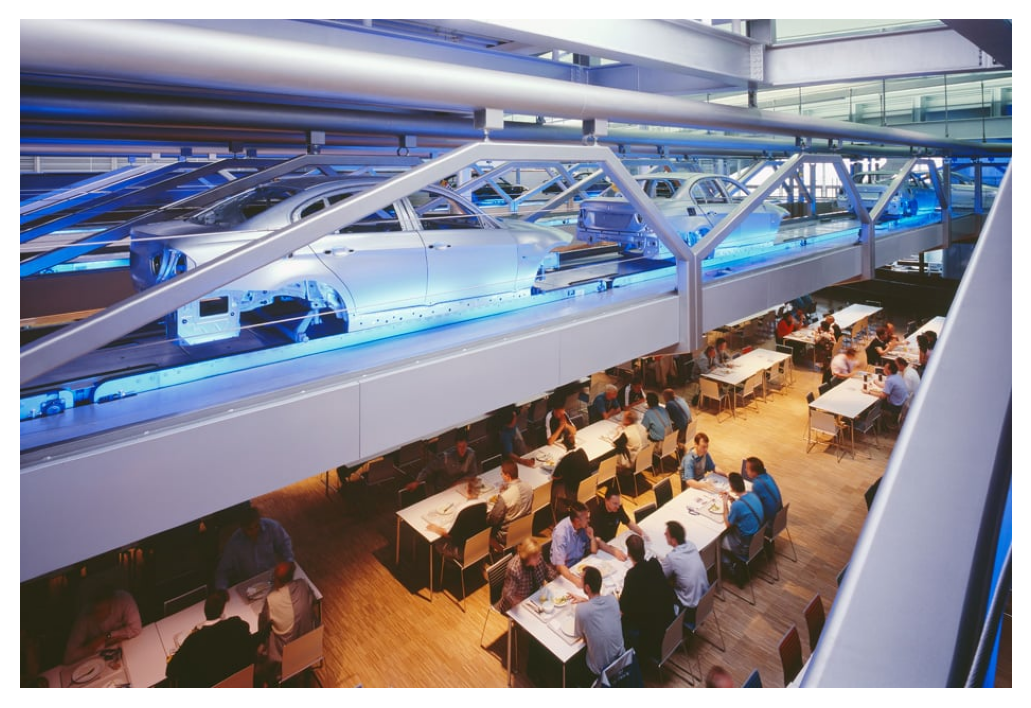

Image features shape: torch.Size([1, 512])


In [ ]:
#@title ___Image 2 Text

import requests
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt
from io import BytesIO

# URL of the image
url = 'https://static.dezeen.com/uploads/2016/06/BMW-Central-Building-by-Zaha-Hadid-Werner-Huthmacher_dezeen_03.jpg'

# Fetch and display the image
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

# Convert the fetched image to RGB mode if it's not already
img = img.convert("RGB")

# Resize the image to a fixed size
img = img.resize((224, 224))  # You can change the size as needed

# Convert the image to a numpy array and normalize pixel values
img_np = np.array(img) / 255.0

# Transpose the dimensions to match the expected format (batch size, channels, height, width)
#img_tensor = torch.tensor(img_np.transpose(2, 0, 1)).unsqueeze(0).cuda()
img_tensor = torch.tensor(img_np.transpose(2, 0, 1)).unsqueeze(0)


# Convert the image to CLIP embedding
with torch.no_grad():
    image_features = model.encode_image(img_tensor).float()

print("Image features shape:", image_features.shape)


In [ ]:
with torch.no_grad():
    image_features = model.encode_image(img_tensor).float()
target_features=image_features
# Tokenize the quotes and compute their features
#text_tokens = clip.tokenize(architecture_quotes).cuda()
text_tokens = clip.tokenize(architecture_quotes)
with torch.no_grad():
    text_features = model.encode_text(text_tokens).float()
    text_features /= text_features.norm(dim=-1, keepdim=True)

# Compute cosine similarity and sort the sentences
cosine_similarities = (text_features @ target_features.T).cpu().numpy().flatten()
sorted_indices = np.argsort(-cosine_similarities)  # Negate for descending order

sorted_quotes = [architecture_quotes[i] for i in sorted_indices]

print("Sorted quotes:")
for similarity, quote in zip(cosine_similarities[sorted_indices], sorted_quotes):
    print(f"{similarity:.2f} - {quote}")

Sorted quotes:
3.01 - Architecture: Where every blueprint is a potential headache waiting to happen. #BlueprintBlunders
2.86 - I'm convinced architects speak their own language, and it's called 'blueprintese'.
2.86 - I'm convinced architects speak their own language, and it's called 'blueprintese'.
2.80 - Architecture: where dreams meet blueprints, and reality laughs.
2.80 - Who needs privacy when you can have a building with walls made entirely of glass? #GlassHouses
2.79 - Architects: turning dreams into blueprints since forever.
2.79 - Architects: turning dreams into blueprints since forever.
2.77 - Architecture: Where 'form follows function' sometimes translates to 'function follows fantasy.'
2.77 - Architecture: where every design is a decision, and every decision is a risk.
2.77 - Architecture: Where 'functional space' sometimes means 'let's see how many rooms we can fit into this space.' #FunctionallyCrowded
2.74 - Architecture: Where 'minimalism' often means 'how much can we st

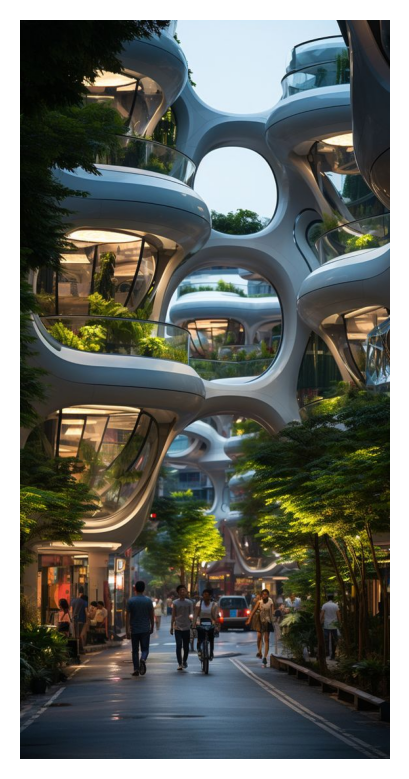

Image features shape: torch.Size([1, 512])


In [ ]:

import requests
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt
from io import BytesIO

# URL of the image
url = 'https://media.tacdn.com/media/attractions-splice-spp-674x446/0b/39/b1/17.jpg'
url ="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRIUxWfJuY4UITmvLNGogwbKNmMvdPy2jJOB9yZe1b9sItOFPWIAPZJ1RIsJm_rEywOnHI&usqp=CAU"


# Path to the image on your drive
image_path = '/content/drive/MyDrive/MIT/SEM 2/Computation Design Lab/Lab 06/Images/ba8c8439a60c9d6cce978a86b542ceea.jpg'

# Load and display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

# # Fetch and display the image
# response = requests.get(url)
# img = Image.open(BytesIO(response.content))
# plt.imshow(img)
# plt.axis('off')  # Hide the axes
# plt.show()

# Convert the fetched image to RGB mode if it's not already
img = img.convert("RGB")

# Resize the image to a fixed size
img = img.resize((224, 224))  # You can change the size as needed

# Convert the image to a numpy array and normalize pixel values
img_np = np.array(img) / 255.0

# Transpose the dimensions to match the expected format (batch size, channels, height, width)
#img_tensor = torch.tensor(img_np.transpose(2, 0, 1)).unsqueeze(0).cuda()
img_tensor = torch.tensor(img_np.transpose(2, 0, 1)).unsqueeze(0)

# Convert the image to CLIP embedding
with torch.no_grad():
    image_features = model.encode_image(img_tensor).float()

print("Image features shape:", image_features.shape)


In [ ]:
with torch.no_grad():
    image_features = model.encode_image(img_tensor).float()
target_features=image_features
# Tokenize the quotes and compute their features
#text_tokens = clip.tokenize(architecture_quotes).cuda()
text_tokens = clip.tokenize(architecture_quotes)
with torch.no_grad():
    text_features = model.encode_text(text_tokens).float()
    text_features /= text_features.norm(dim=-1, keepdim=True)

# Compute cosine similarity and sort the sentences
cosine_similarities = (text_features @ target_features.T).cpu().numpy().flatten()
sorted_indices = np.argsort(-cosine_similarities)  # Negate for descending order

sorted_quotes = [architecture_quotes[i] for i in sorted_indices]

print("Sorted quotes:")
for similarity, quote in zip(cosine_similarities[sorted_indices], sorted_quotes):
    print(f"{similarity:.2f} - {quote}")

Sorted quotes:
3.12 - Architecture: Where 'form follows function' sometimes translates to 'function follows fantasy.'
3.11 - When the building's design is so futuristic, it's practically from another dimension. #ArchitecturalAlien
3.10 - Architecture: where every curve is a challenge, and every challenge is an opportunity.
3.06 - Architecture: Where 'sustainability' often means 'how long can we recycle this trendy material?'
3.04 - Who needs straight lines when you can have a building that's all curves? #CurvyArchitecture
3.03 - Architecture: where form meets dysfunction.
3.03 - Architecture: where form meets dysfunction.
3.03 - Architecture: where every form is a function, and every function is a form.
3.02 - Architecture: Where 'minimalism' often means 'how much can we strip away before it collapses?'
3.02 - Architecture: where creativity meets concrete.
3.02 - Architecture: where creativity meets concrete.
3.00 - Who needs straight lines when you can have a building that looks like 

If you really really want to train your own CLIP

You way want to check the link:https://colab.research.google.com/drive/1hYHb0FTdKQCXZs3qCwVZnSuVGrZU2Z1w?usp=sharing